In [ ]:
import pandas as pd
import numpy as np
import regex
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import spacy
import textstat
from textblob import TextBlob

from nltk.tokenize import sent_tokenize, wordpunct_tokenize
from nltk import pos_tag

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr, ttest_ind

nlp = spacy.load("en_core_web_sm")

In [4]:
df = pd.read_csv('preprocessed_data.csv')
df

,title,text,label,clean_text,clean_title,clean_text_without_stopwords,clean_title_without_stopwords,text_lemmatized,title_lemmatized
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,"['comment', 'expected', 'from', 'barack', 'oba...","['law', 'enforcement', 'high', 'alert', 'follo...","['comment', 'expected', 'barack', 'obama', 'me...","['law', 'enforcement', 'high', 'alert', 'follo...","['comment', 'expect', 'barack', 'obama', 'memb...","['law', 'enforcement', 'high', 'alert', 'follo..."
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last n...",1,"['now', 'most', 'the', 'demonstrators', 'gathe...","['unbelievable', 'obama', 'attorney', 'general...","['demonstrators', 'gathered', 'last', 'night',...","['unbelievable', 'obama', 'attorney', 'general...","['demonstrator', 'gather', 'last', 'night', 'e...","['unbelievable', 'obama', 'attorney', 'general..."
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"['dozen', 'politically', 'active', 'pastors', ...","['bobby', 'jindal', 'raised', 'hindu', 'uses',...","['dozen', 'politically', 'active', 'pastors', ...","['bobby', 'jindal', 'raised', 'hindu', 'uses',...","['dozen', 'politically', 'active', 'pastor', '...","['bobby', 'jindal', 'raise', 'hindu', 'us', 's..."
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"['the', 'sarmat', 'missile', 'dubbed', 'satan'...","['satan', 'russia', 'unvelis', 'image', 'its',...","['sarmat', 'missile', 'dubbed', 'satan', 'repl...","['satan', 'russia', 'unvelis', 'image', 'terri...","['sarmat', 'missile', 'dub', 'satan', 'replace...","['satan', 'russia', 'unvelis', 'image', 'terri..."
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1,"['all', 'can', 'say', 'this', 'one', 'about', ...","['about', 'time', 'christian', 'group', 'sues'...","['say', 'one', 'time', 'someone', 'sued', 'sou...","['time', 'christian', 'group', 'sues', 'amazon...","['say', 'one', 'time', 'someone', 'sue', 'sout...","['time', 'christian', 'group', 'sue', 'amazon'..."
...,...,...,...,...,...,...,...,...,...
61765,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1,"['email', 'released', 'wikileaks', 'sunday', '...","['wikileaks', 'email', 'shows', 'clinton', 'fo...","['email', 'released', 'wikileaks', 'sunday', '...","['wikileaks', 'email', 'shows', 'clinton', 'fo...","['email', 'release', 'wikileaks', 'sunday', 'a...","['wikileaks', 'email', 'show', 'clinton', 'fou..."
61766,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,"['washington', 'reuters', 'hackers', 'believed...","['russians', 'steal', 'research', 'trump', 'ha...","['washington', 'reuters', 'hackers', 'believed...","['russians', 'steal', 'research', 'trump', 'ha...","['washington', 'reuters', 'hacker', 'believe',...","['russian', 'steal', 'research', 'trump', 'hac..."
61767,WATCH: Giuliani Demands That Democrats Apologi...,"You know, because in fantasyland Republicans n...",1,"['you', 'know', 'because', 'fantasyland', 'rep...","['watch', 'giuliani', 'demands', 'that', 'demo...","['know', 'fantasyland', 'republicans', 'never'...","['watch', 'giuliani', 'demands', 'democrats', ...","['know', 'fantasyland', 'republicans', 'never'...","['watch', 'giuliani', 'demand', 'democrat', 'a..."
61768,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,"['migrants', 'refuse', 'leave', 'train', 'refu...","['migrants', 'refuse', 'leave', 'train', 'refu...","['migrants', 'refuse', 'leave', 'train', 'refu...","['migrants', 'refuse', 'leave', 'train', 'refu...","['migrant', 'refuse', 'leave', 'train', 'refug...","['migrant', 'refuse', 'leave', 'train', 'refug..."


In [6]:
df['clean_text'] = df['clean_text'].apply(lambda x: eval(x))
df['clean_title'] = df['clean_title'].apply(lambda x: eval(x))
df['clean_text_without_stopwords'] = df['clean_text_without_stopwords'].apply(lambda x: eval(x))
df['clean_title_without_stopwords'] = df['clean_title_without_stopwords'].apply(lambda x: eval(x))
df['text_lemmatized'] = df['text_lemmatized'].apply(lambda x: eval(x))
df['title_lemmatized'] = df['title_lemmatized'].apply(lambda x: eval(x))

Plecand de la articolul https://ieeexplore.ieee.org/document/9395133, exista 4 tipuri de caracteristici ce pot fi extrase din text.

1. Writing pattern (Model de scriere)

    - Număr de caractere speciale
    - Număr de litere mari
    - Număr de propoziții scurte
    - Număr de propoziții lungi
    - Număr de determinanți


In [7]:
def special_characters(text):
    # \p{L} orice litera din orice alfabet
    # \p{N} orice cifra
    # \s spatii
    special_chars = regex.findall(r'[^\p{L}\p{N}\s]', text)
    return len(special_chars)

df['special_characters_text'] = df['text'].apply(special_characters)
df['special_characters_title'] = df['title'].apply(special_characters)

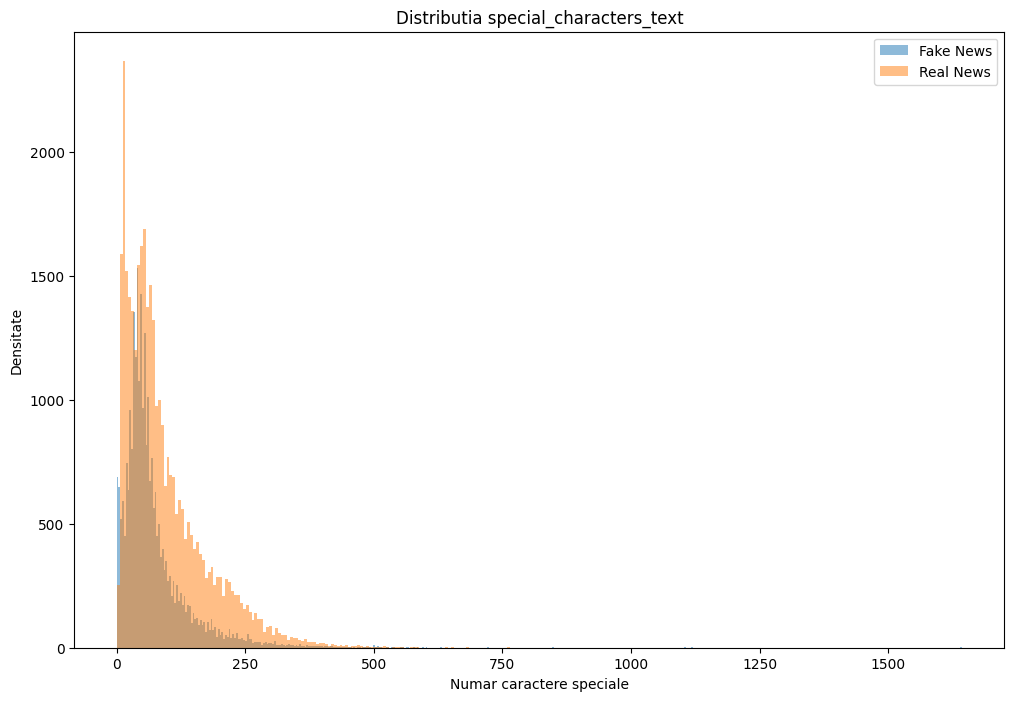

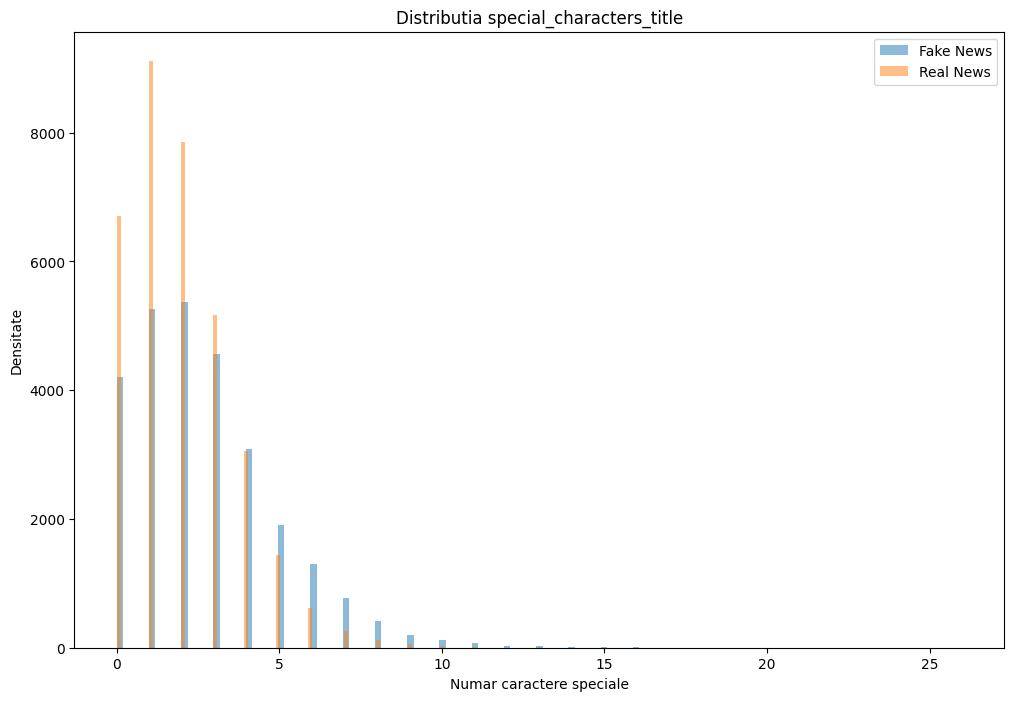

In [8]:
for indicator in ['special_characters_text', 'special_characters_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar caractere speciale')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()

In [9]:
def count_uppercase_letters(text):
    return sum(1 for char in text if char.isalpha() and char.isupper())
df['no_uppercase_text'] = df['text'].apply(count_uppercase_letters)
df['no_uppercase_title'] = df['title'].apply(count_uppercase_letters)

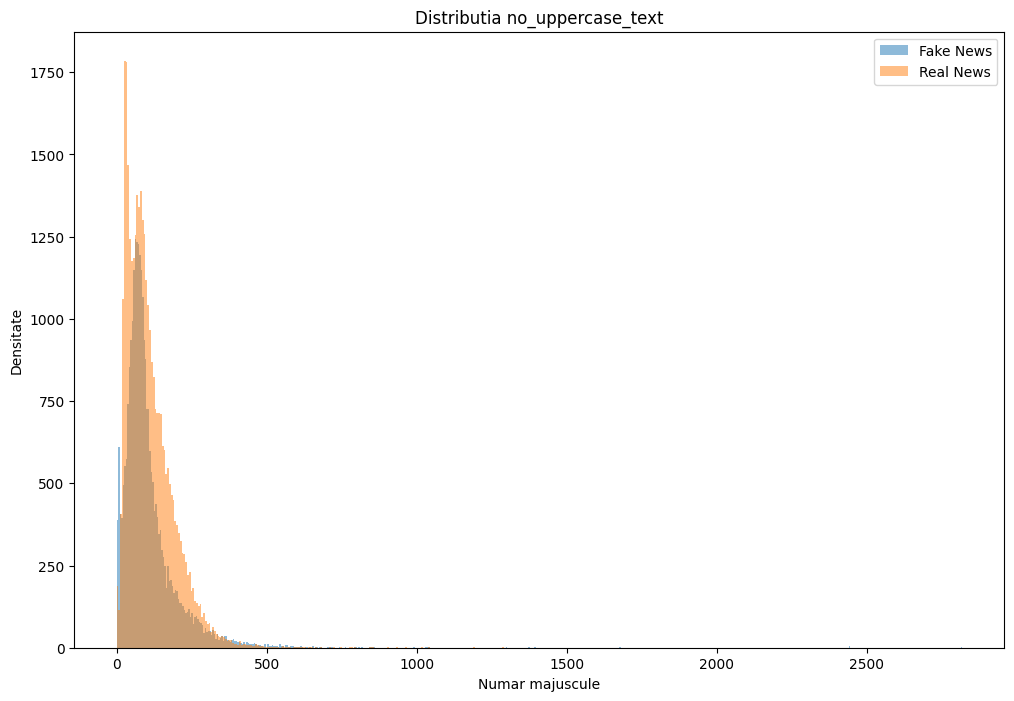

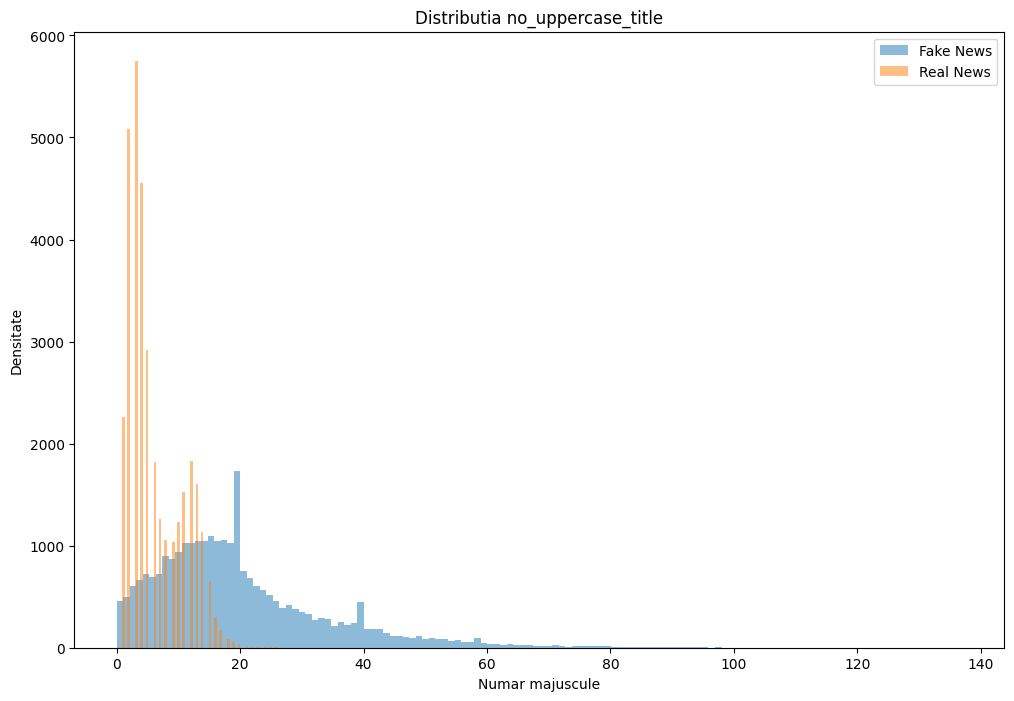

In [10]:
for indicator in ['no_uppercase_text', 'no_uppercase_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar majuscule')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()

In [11]:
def count_short_long_sentences(text, short_thresh=5, long_thresh=15):
    sentences = sent_tokenize(text)
    short_count = 0
    long_count = 0
    
    for sentence in sentences:
        words = wordpunct_tokenize(sentence)
        num_words = sum(1 for word in words if word.isalnum())
        
        if num_words <= short_thresh:
            short_count += 1
        elif num_words >= long_thresh:
            long_count += 1
    
    return short_count, long_count

df['short_sentences'], df['long_sentences'] = zip(*df['text'].apply(count_short_long_sentences))

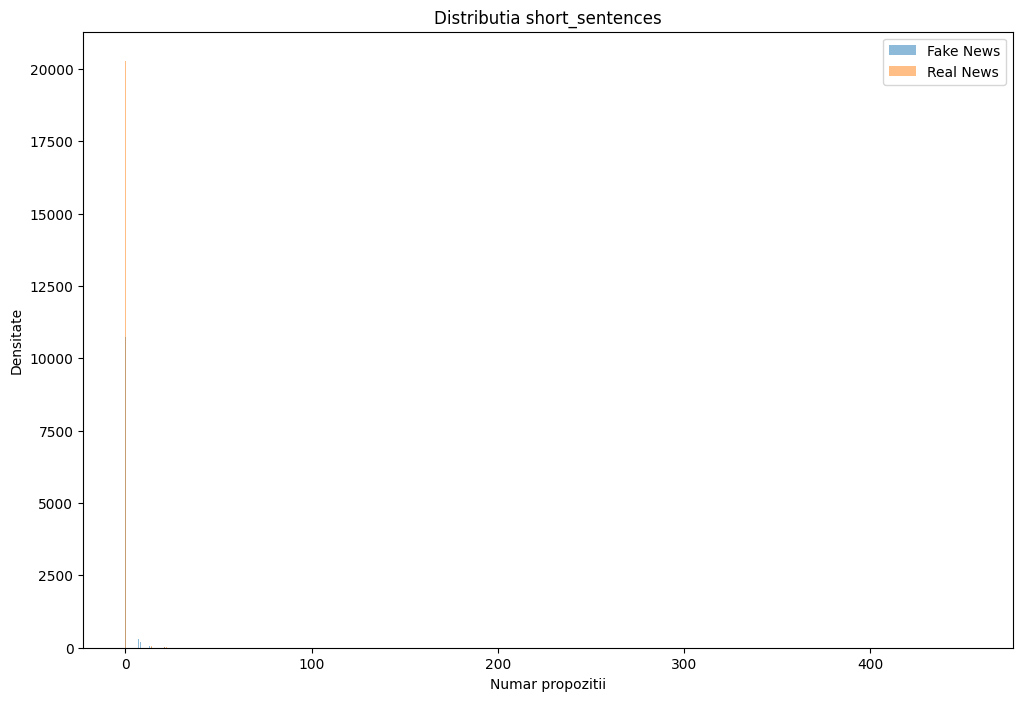

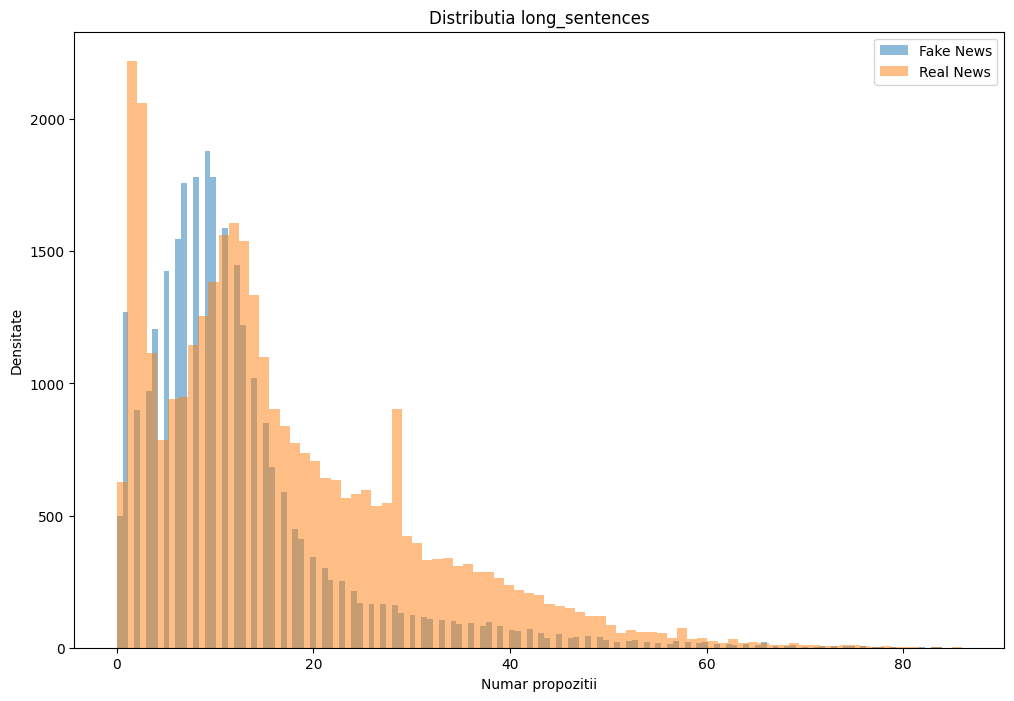

In [12]:
for indicator in ['short_sentences', 'long_sentences']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar propozitii')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()

In [13]:
tqdm.pandas()
def count_pos_nltk(tokens):
    
    counts = {
        'no_adjectives': 0,
        'no_determiners': 0,
        'no_adverbs': 0,
        'no_verbs': 0,
        'no_nouns': 0,
    }

    if not isinstance(tokens, list):
        return counts
    
    pos_tags = pos_tag(tokens)
    
    for word, tag in pos_tags:
        if tag.startswith('JJ'):   # adjective
            counts['no_adjectives'] += 1
        elif tag.startswith('DT'):  # determiner
            counts['no_determiners'] += 1
        elif tag.startswith('RB'):  # adverb
            counts['no_adverbs'] += 1
        elif tag.startswith('VB'):  # verb
            counts['no_verbs'] += 1
        elif tag.startswith('NN'):  # noun
            counts['no_nouns'] += 1
    
    return counts

In [14]:
pos_text = df['clean_text'].progress_apply(count_pos_nltk)
pos_title = df['clean_title'].progress_apply(count_pos_nltk)

100%|██████████| 61770/61770 [00:26<00:00, 2304.86it/s]


In [15]:
pos_text_df = pd.DataFrame(pos_text.tolist())
pos_title_df = pd.DataFrame(pos_title.tolist())

pos_title_df = pos_title_df.rename(columns={
    'no_adjectives': 'no_adjectives_title',
    'no_determiners': 'no_determiners_title',
    'no_adverbs': 'no_adverbs_title',
    'no_verbs': 'no_verbs_title',
    'no_nouns': 'no_nouns_title',
})

df = pd.concat([df, pos_text_df, pos_title_df], axis=1)

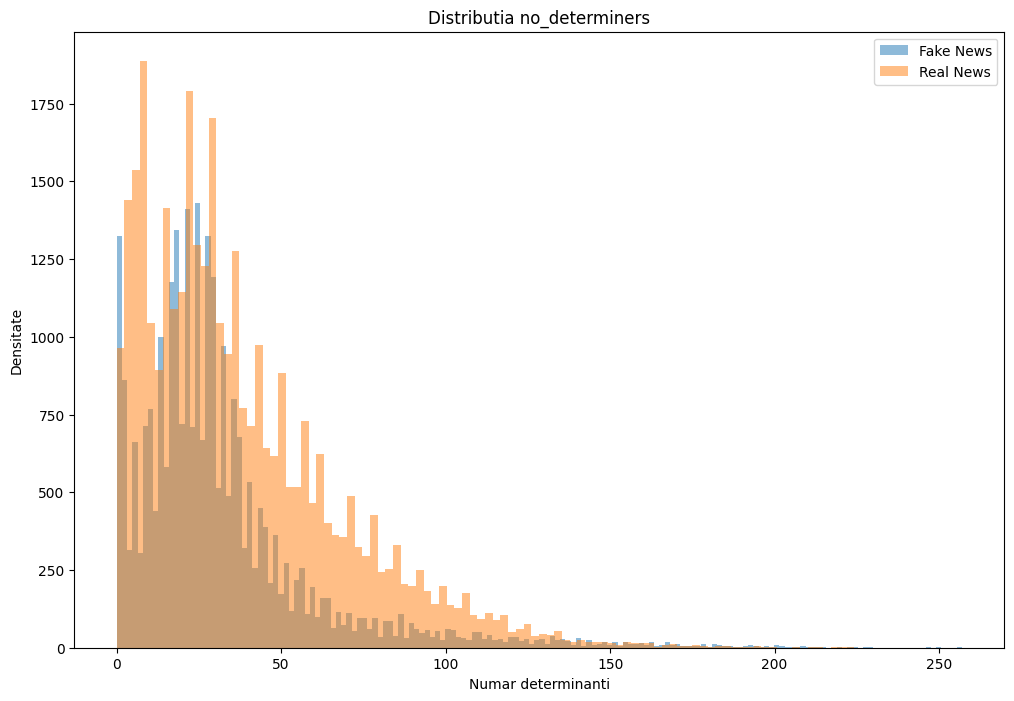

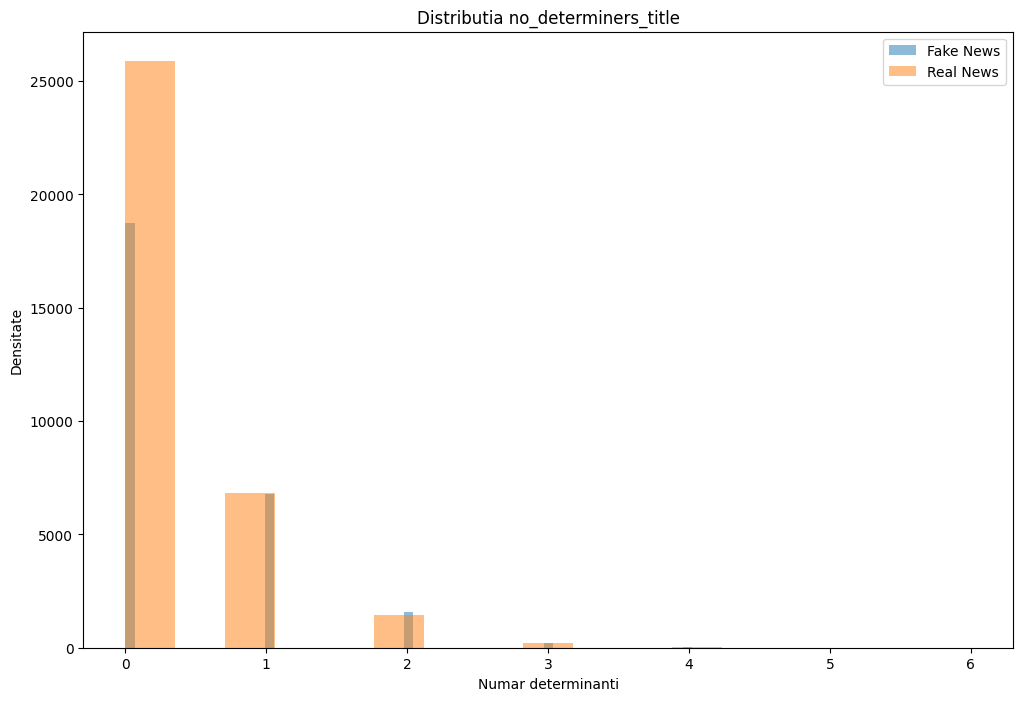

In [16]:
for indicator in ['no_determiners', 'no_determiners_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar determinanti')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()

2. Grammar (readability index) 

    - Indice de lizibilitate Gunning fog grade - estimează nivelul de educație necesar pentru a înțelege un text
    - Indice de lizibilitate SMOG - estimează câți ani de școală sunt necesari ca să înțelegi un text.
    - Indice automat de lizibilitate - un alt scor bazat pe lungimea cuvintelor și propozițiilor.

In [17]:
def readability_scores(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return {'gunning_fog': 0, 'smog_index': 0, 'ari': 0}
    
    return {
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'ari': textstat.automated_readability_index(text)
    }

In [18]:
tqdm.pandas()
df[['gunning_fog', 'smog_index', 'ari']] = df['text'].progress_apply(readability_scores).apply(pd.Series)

  0%|          | 0/61770 [00:00<?, ?it/s]

100%|██████████| 61770/61770 [02:52<00:00, 357.27it/s]


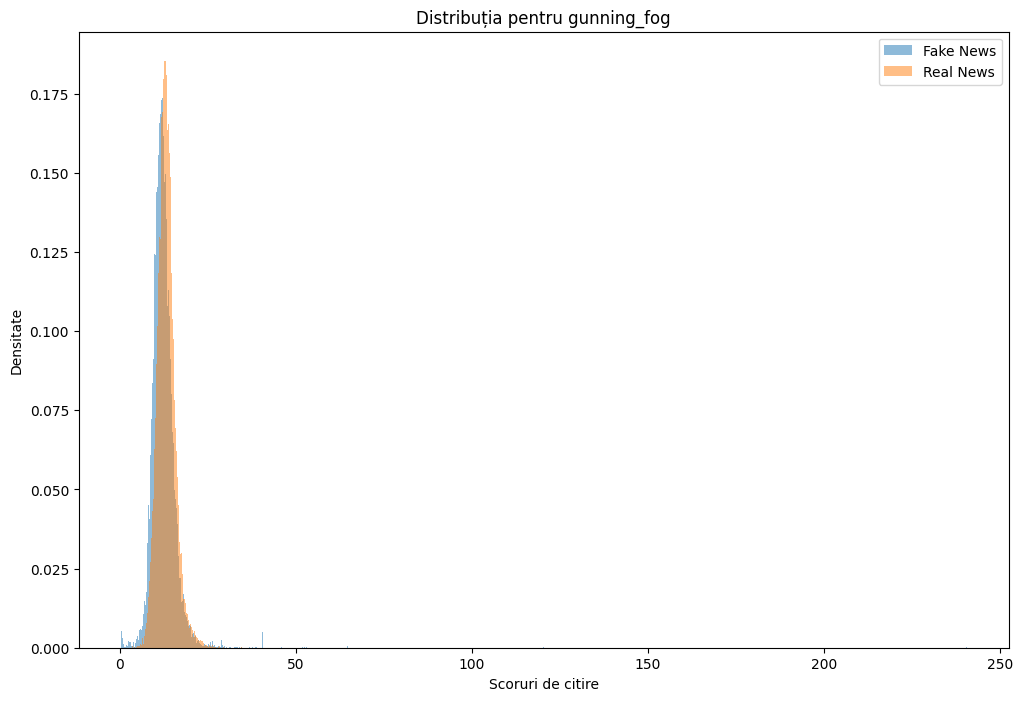

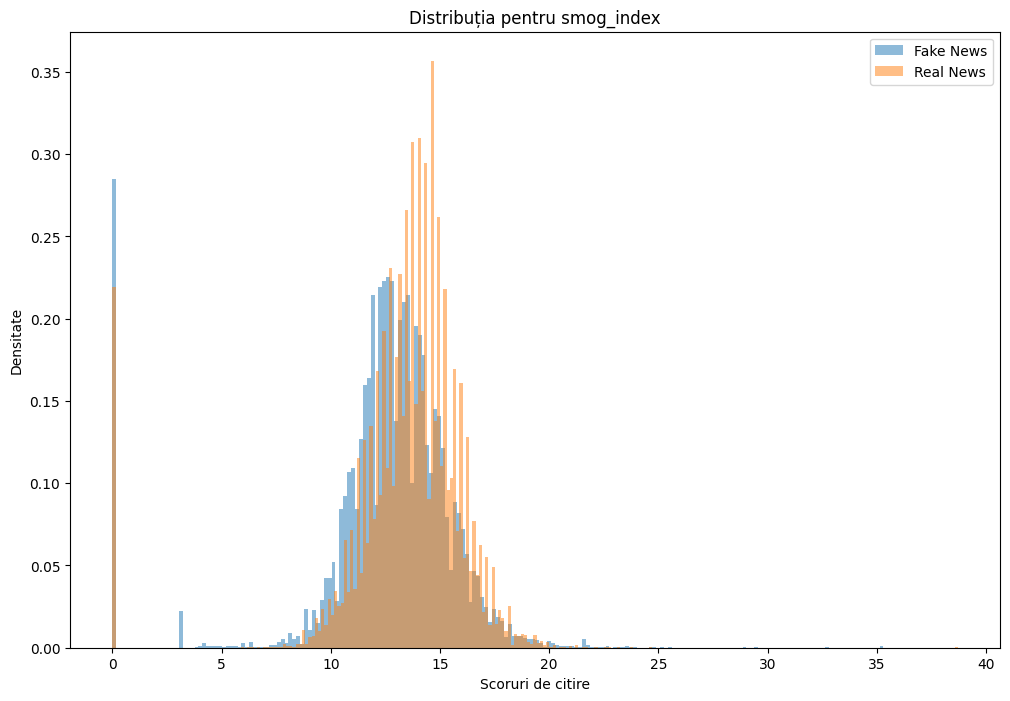

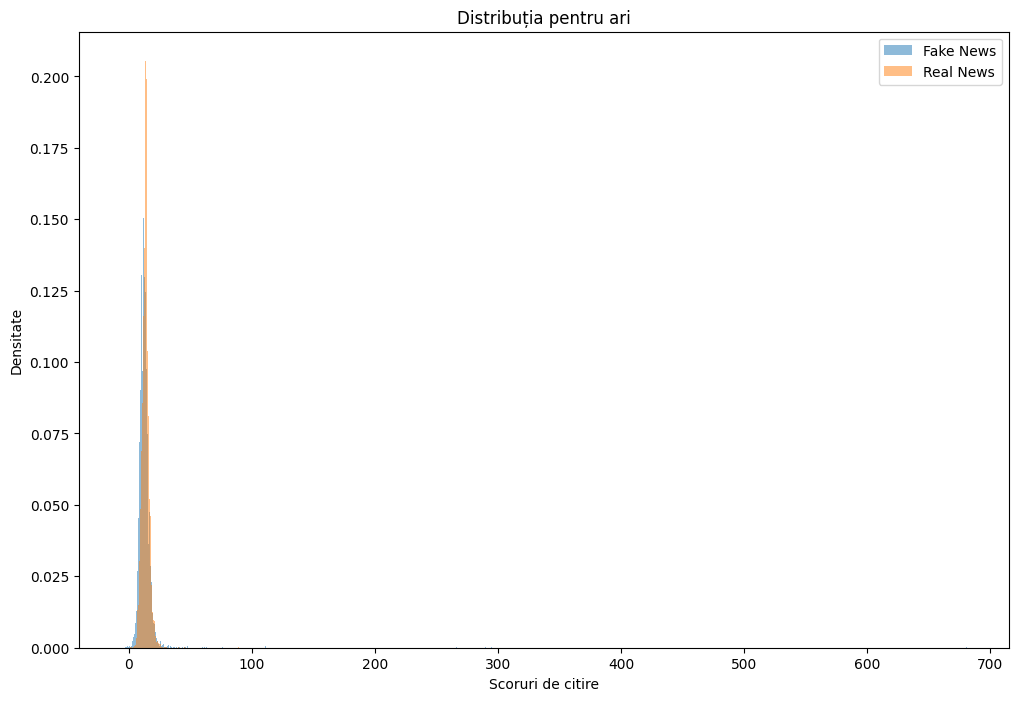

In [19]:
for indicator in ['gunning_fog', 'smog_index', 'ari']:
    plt.figure(figsize=(12, 8))
    
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    
    plt.xlabel('Scoruri de citire')
    plt.ylabel('Densitate')
    plt.legend(loc='upper right')
    plt.title(f'Distribuția pentru {indicator}')
    plt.show()

3. Psycho-linguistics (Psiholingvistică)

    - Polaritatea textului
    - Similaritatea titlului
    - Subiectivitate

In [20]:
def polarity(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0
    return TextBlob(text).sentiment.subjectivity

In [21]:
df['polarity'] = df['text'].progress_apply(polarity)
df['subjectivity'] = df['text'].progress_apply(subjectivity)

100%|██████████| 61770/61770 [02:20<00:00, 438.61it/s]


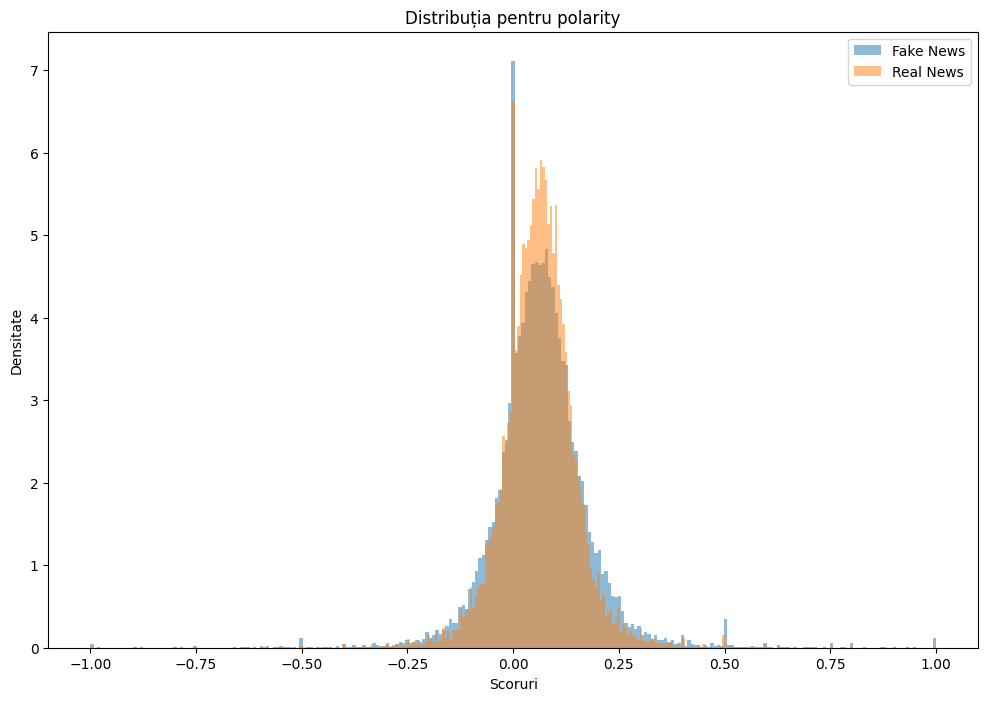

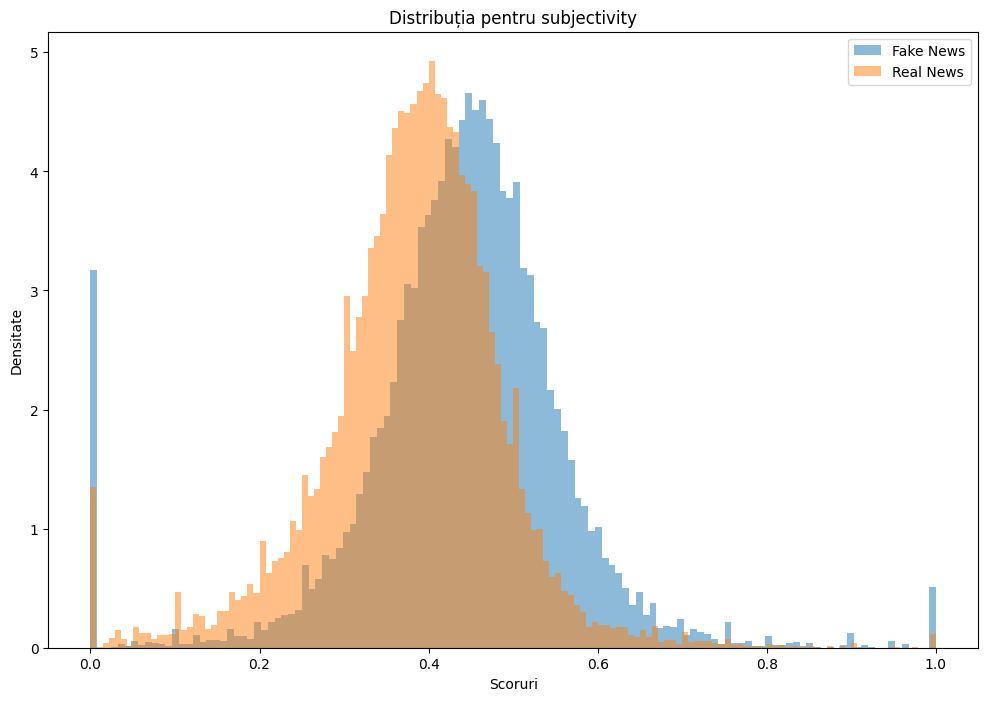

In [22]:
for indicator in ['polarity', 'subjectivity']:
    plt.figure(figsize=(12, 8))
    
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    
    plt.xlabel('Scoruri')
    plt.ylabel('Densitate')
    plt.legend(loc='upper right')
    plt.title(f'Distribuția pentru {indicator}')
    plt.show()

In [23]:
tqdm.pandas()
all_texts = pd.concat([df['title'], df['text']]).unique()

vectorizer = TfidfVectorizer()
vectorizer.fit(all_texts)

def title_text_similarity(row):
    title = row['title']
    text = row['text']
    
    if not isinstance(title, str) or not isinstance(text, str):
        return 0
    if len(title.strip()) == 0 or len(text.strip()) == 0:
        return 0
    
    title_vec = vectorizer.transform([title])
    text_vec = vectorizer.transform([text])
    
    sim = cosine_similarity(title_vec, text_vec)
    return sim[0][0]

In [24]:
df['title_text_similarity'] = df.progress_apply(title_text_similarity, axis=1)

100%|██████████| 61770/61770 [02:13<00:00, 461.22it/s]


Text(0.5, 1.0, 'Distribuția pentru similaritate titlu-text')

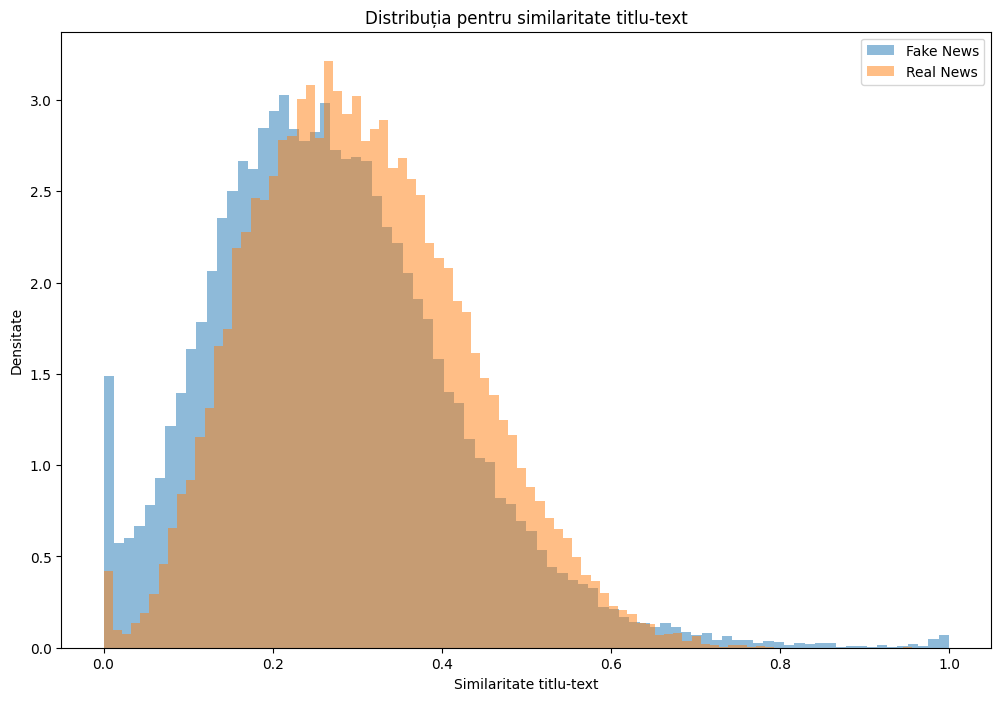

In [25]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['title_text_similarity'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['title_text_similarity'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Similaritate titlu-text')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('Distribuția pentru similaritate titlu-text')

4. Quantity (Cantitate)

    - Număr de silabe
    - Număr de cuvinte
    - Rată a adjectivelor și adverbelor
    - Cuvinte per propoziție
    - Număr de verbe
    - Număr de adjective
    - Număr de adverbe
    - Numar de substantive
    - Număr de propoziții

In [26]:
def count_syllables(text):
    if not isinstance(text, str):
        return 0
    return textstat.syllable_count(text)

df['syllables_text'] = df['text'].progress_apply(count_syllables)

100%|██████████| 61770/61770 [00:39<00:00, 1573.99it/s]


Text(0.5, 1.0, 'Distribuția pentru numărul de silabe în text')

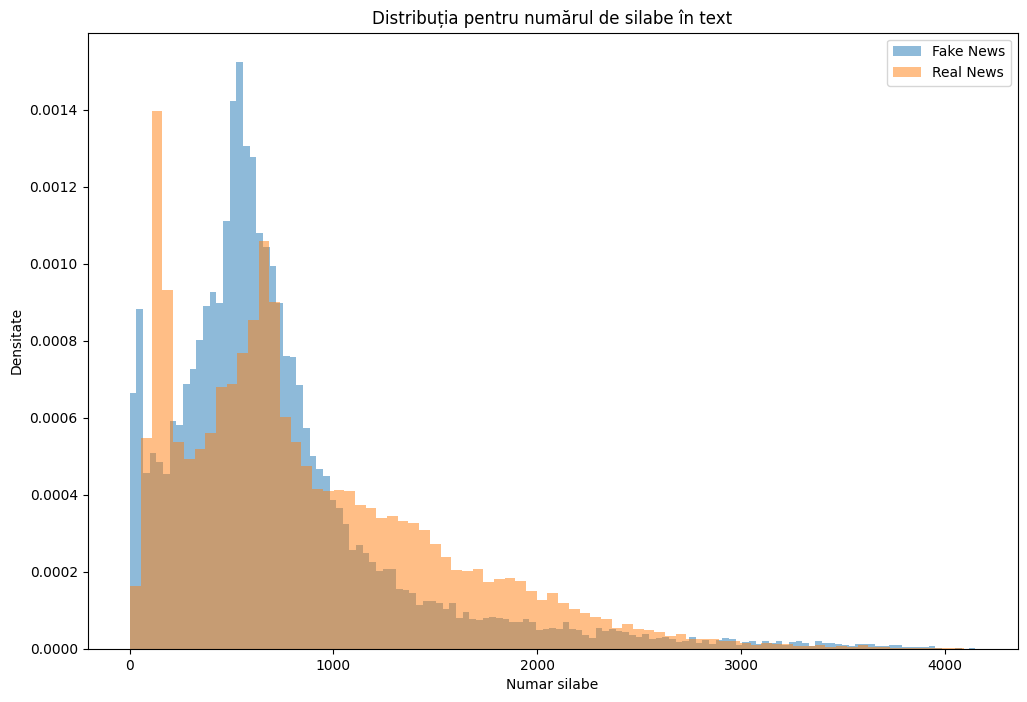

In [27]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['syllables_text'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['syllables_text'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Numar silabe')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('Distribuția pentru numărul de silabe în text')

In [28]:
df['no_words_text'] = df['clean_text'].apply(lambda x: len(x))
df['no_words_title'] = df['clean_title'].apply(lambda x: len(x))

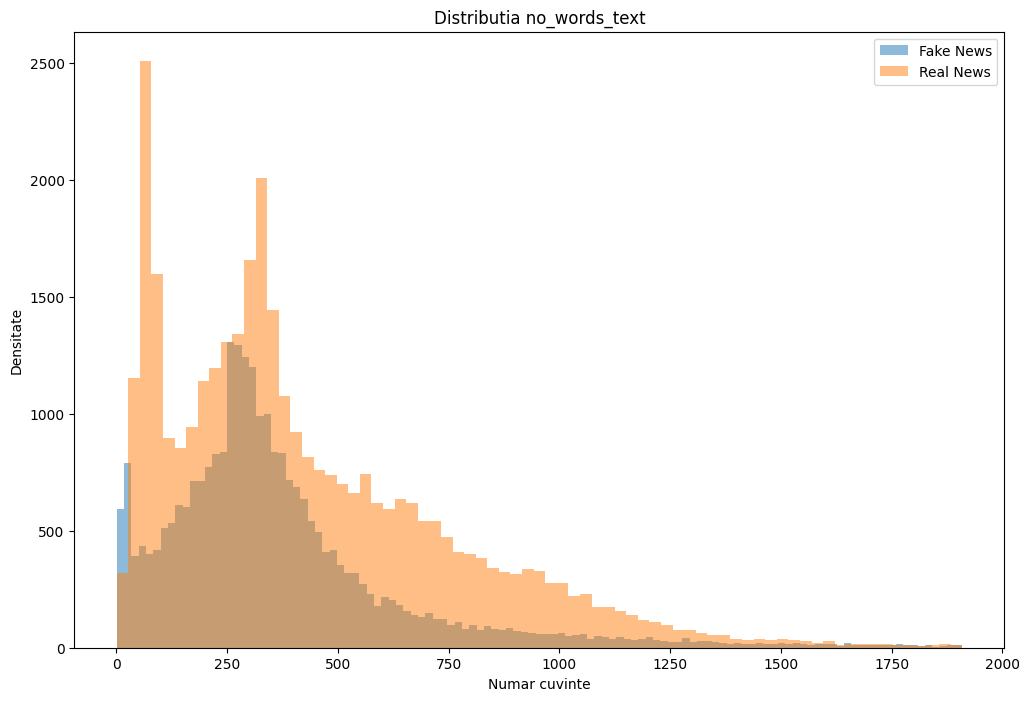

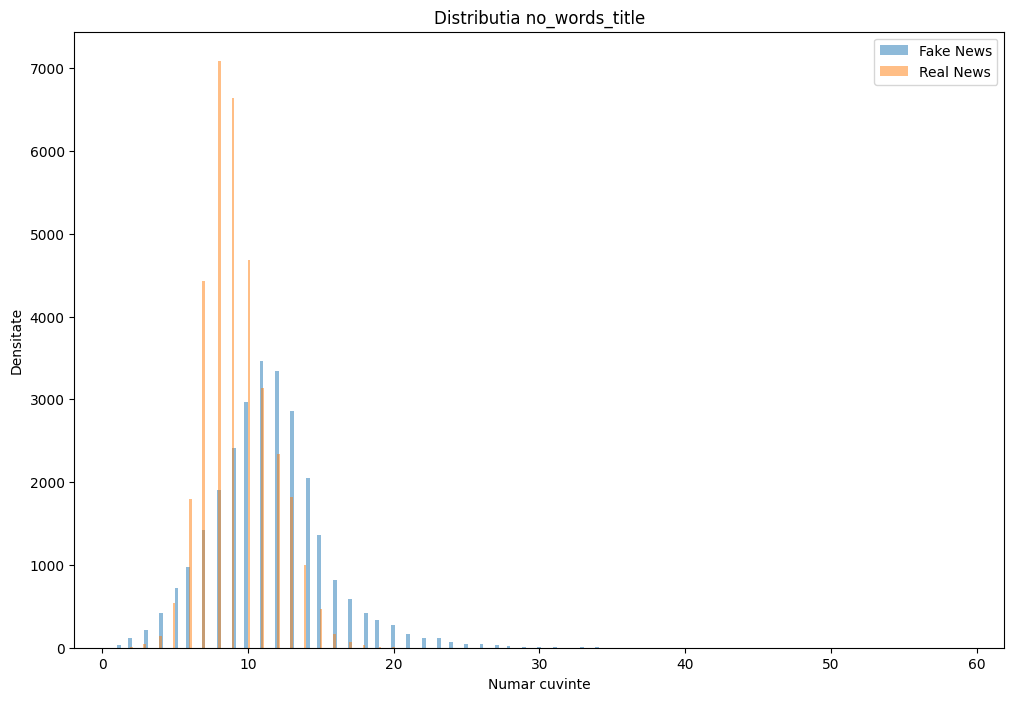

In [29]:
for indicator in ['no_words_text', 'no_words_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar cuvinte')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()

In [ ]:
def rate_adj_adv_text(row):
    total = row['no_words_text']
    if total == 0:
        return 0
    return (row['no_adjectives'] + row['no_adverbs']) / total

df['adj_adv_rate_text'] = df.apply(rate_adj_adv_text, axis=1)

def rate_adj_adv_title(row):
    total = row['no_words_title']
    if total == 0:
        return 0
    return (row['no_adjectives_title'] + row['no_adverbs_title']) / total

df['adj_adv_rate_title'] = df.apply(rate_adj_adv_title, axis=1)

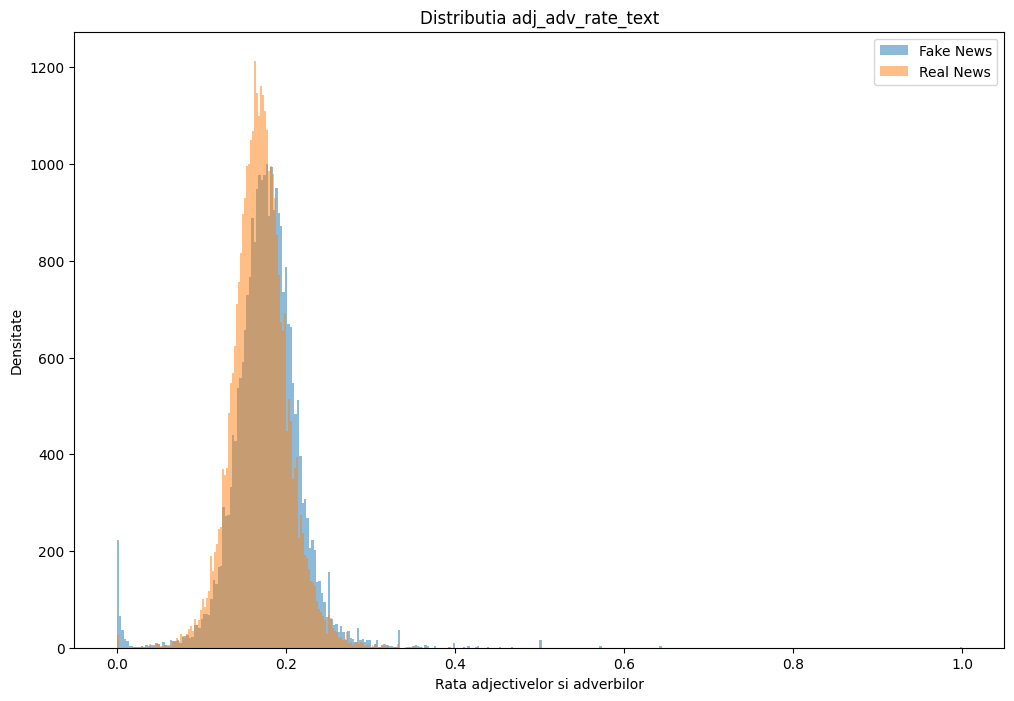

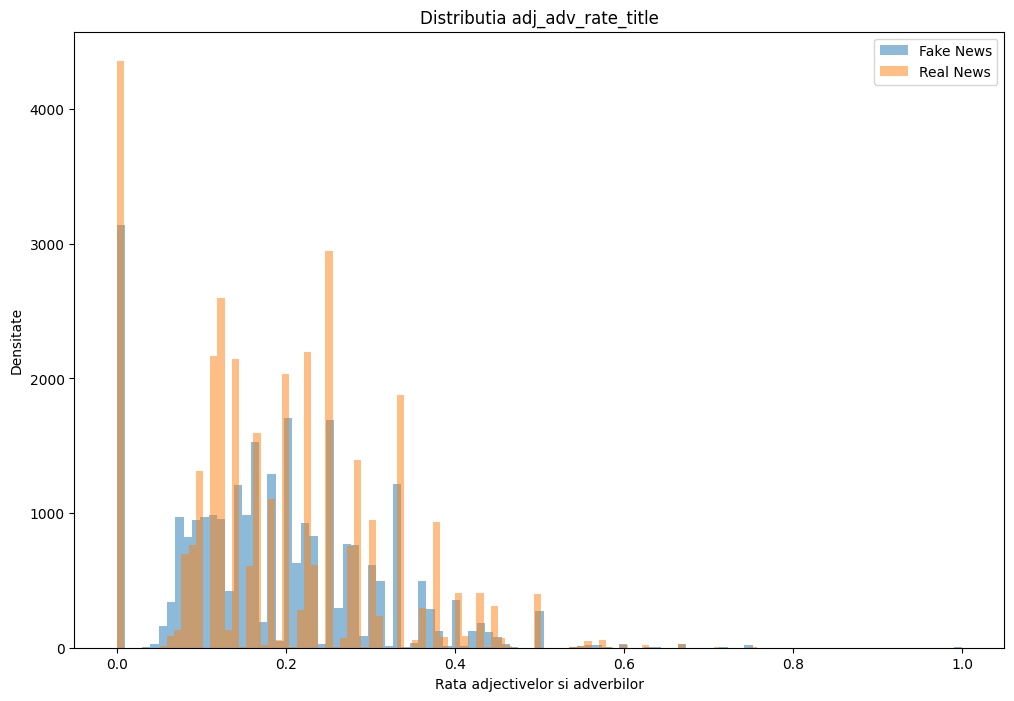

In [31]:
for indicator in ['adj_adv_rate_text', 'adj_adv_rate_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Rata adjectivelor si adverbilor')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator}')
    plt.show()  

In [32]:
def words_per_sentence(row):
    if isinstance(row['text'], str):
        no_sentences = len(sent_tokenize(row['text']))
    else:
        no_sentences = 0
    
    no_words = len(row['clean_text']) if isinstance(row['clean_text'], list) else 0
    
    if no_sentences == 0:
        return 0
    return no_words / no_sentences

df['words_per_sentence'] = df.apply(words_per_sentence, axis=1)

Text(0.5, 1.0, 'Distribuția pentru cuvinte pe propoziție')

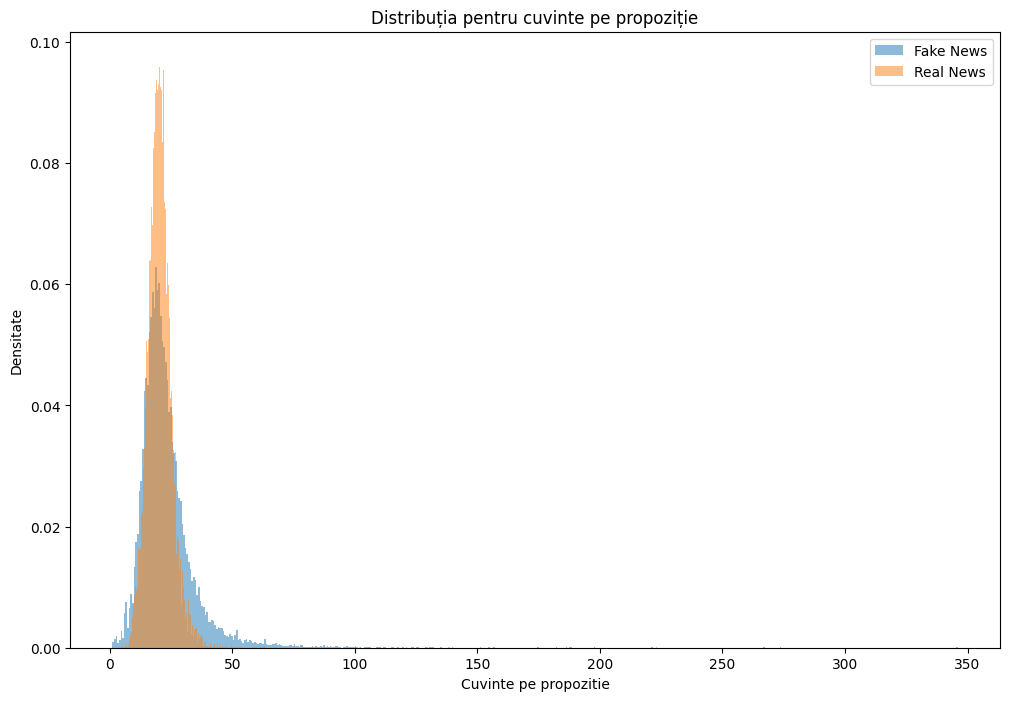

In [33]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['words_per_sentence'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['words_per_sentence'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Cuvinte pe propozitie')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('Distribuția pentru cuvinte pe propoziție')

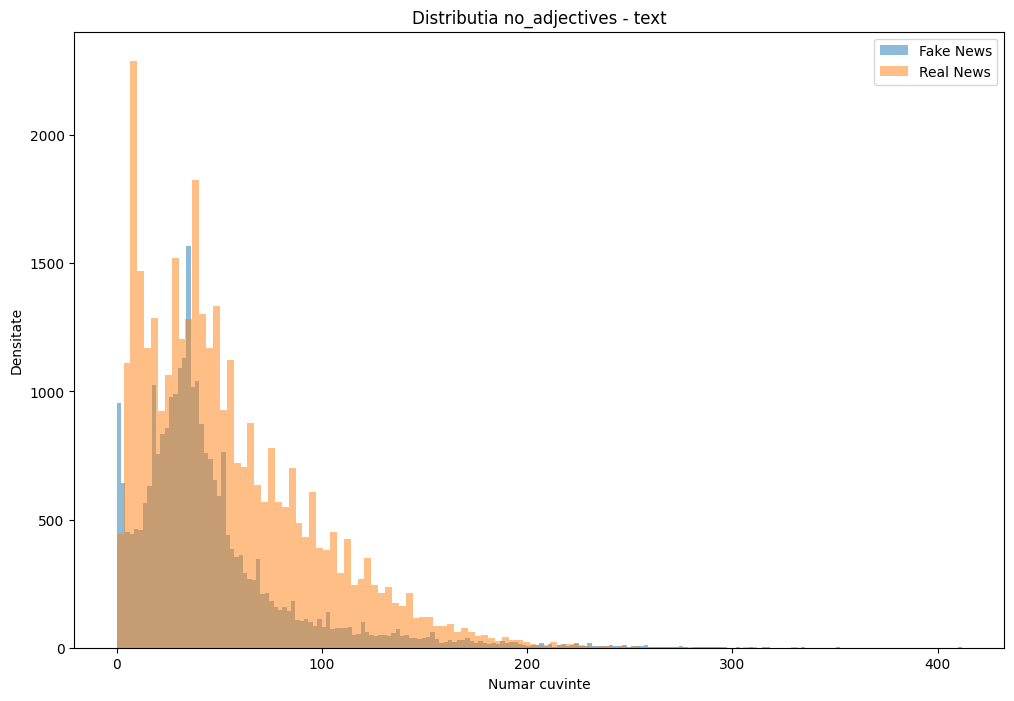

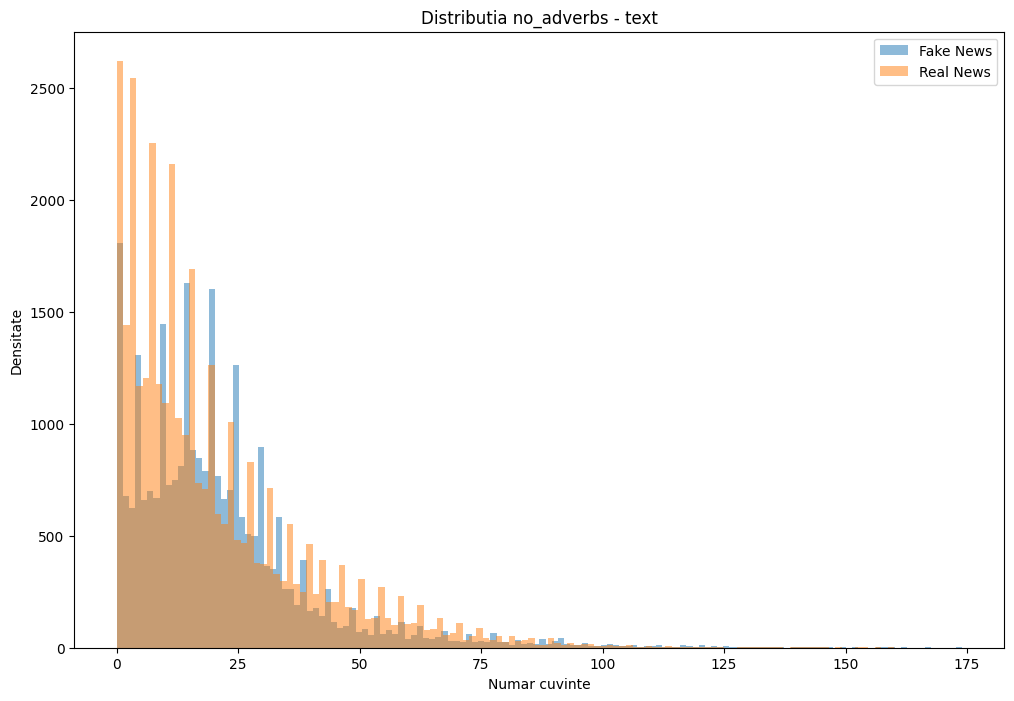

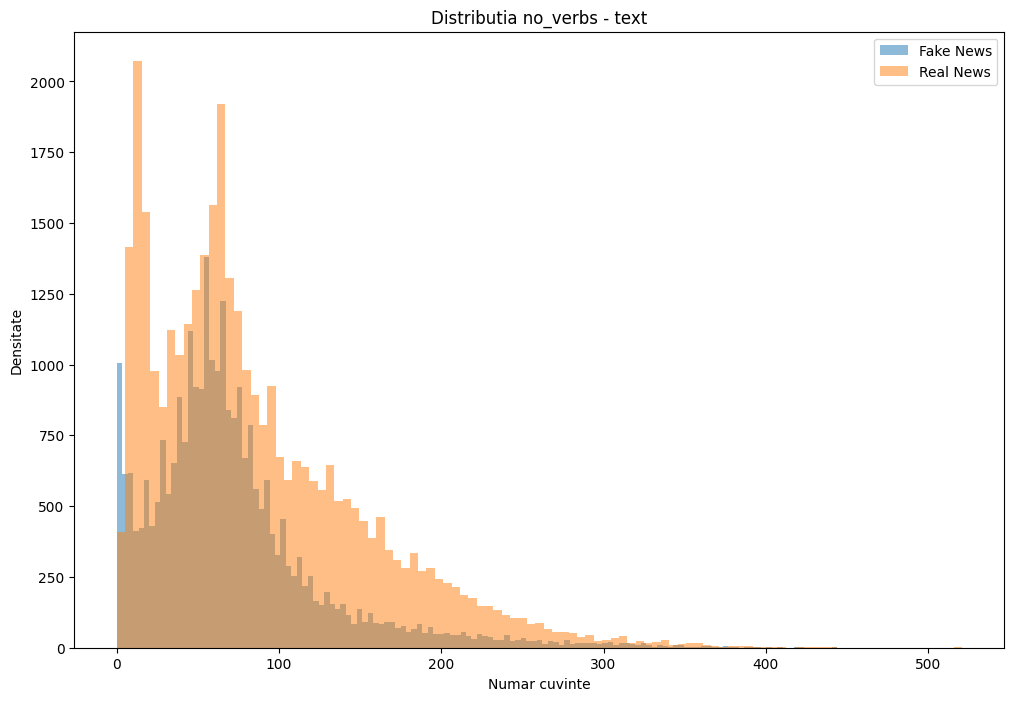

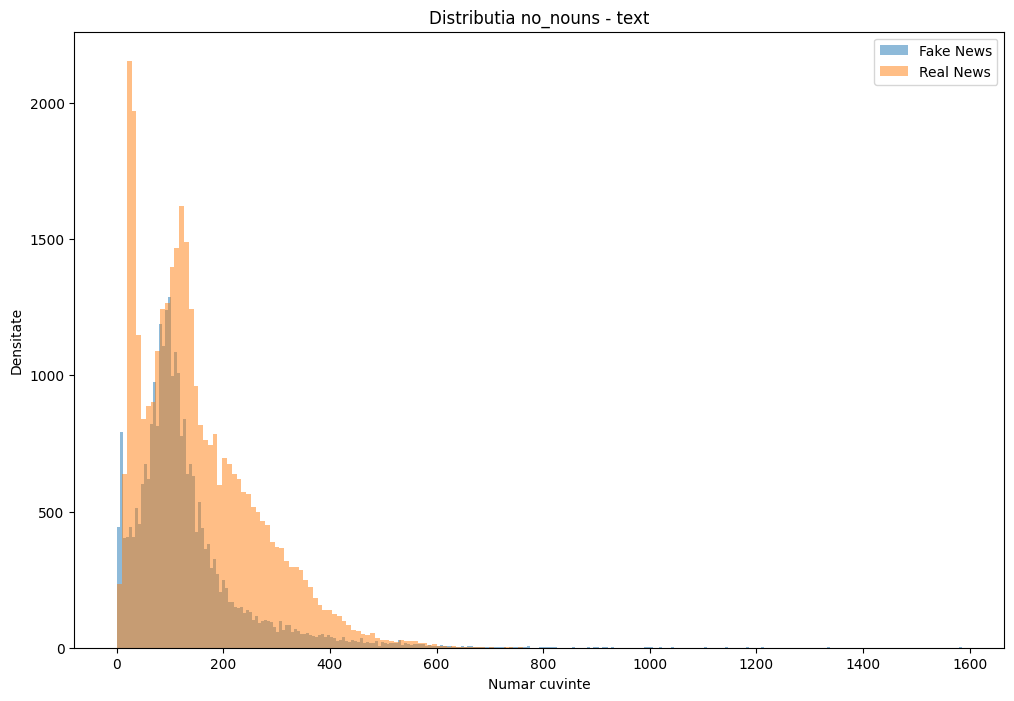

In [34]:
for indicator in ['no_adjectives', 'no_adverbs', 'no_verbs', 'no_nouns']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('Numar cuvinte')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator} - text')
    plt.show()

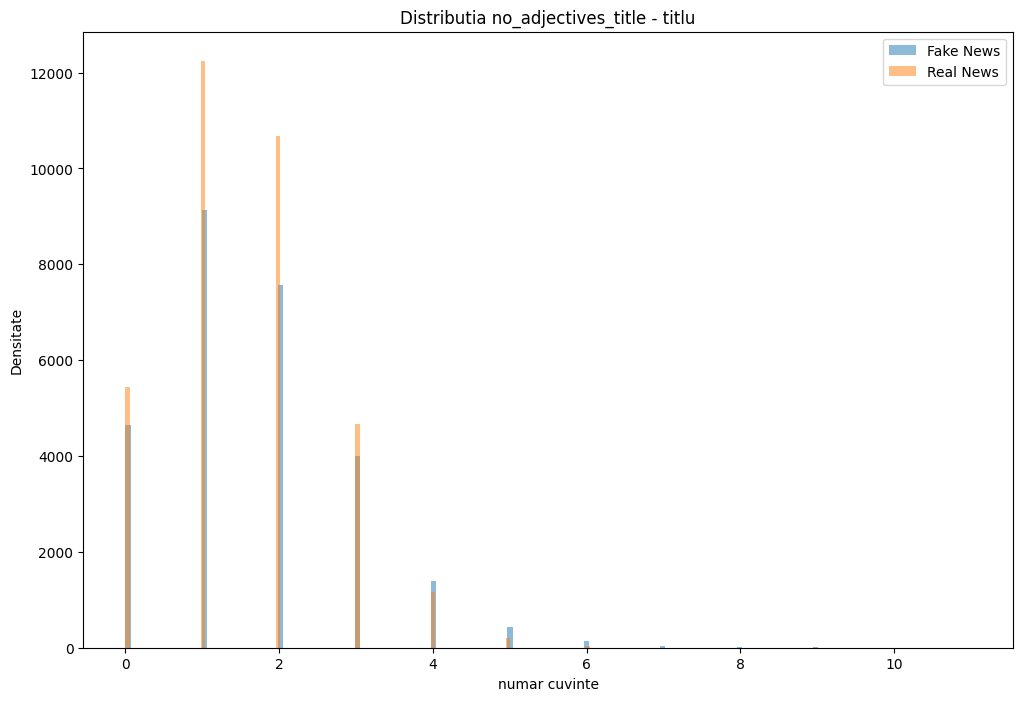

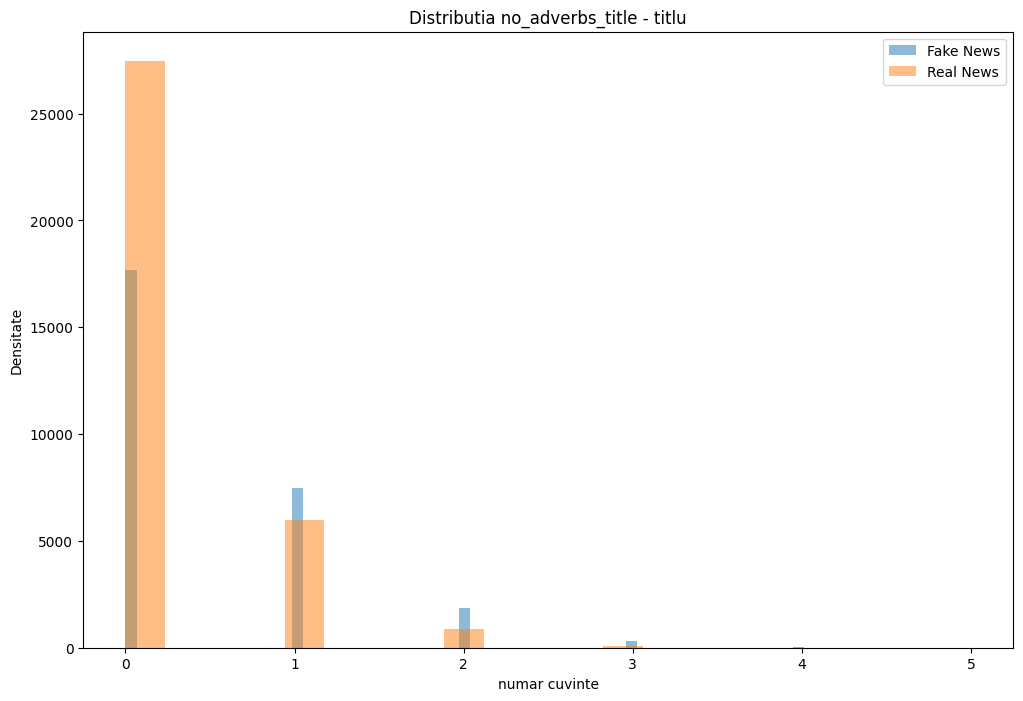

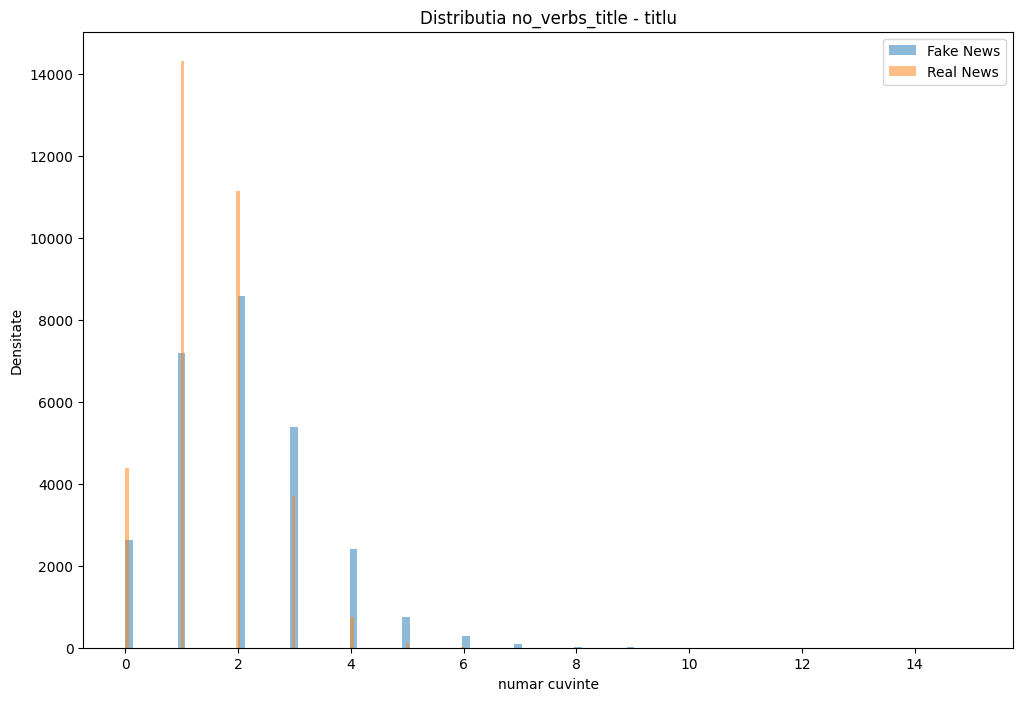

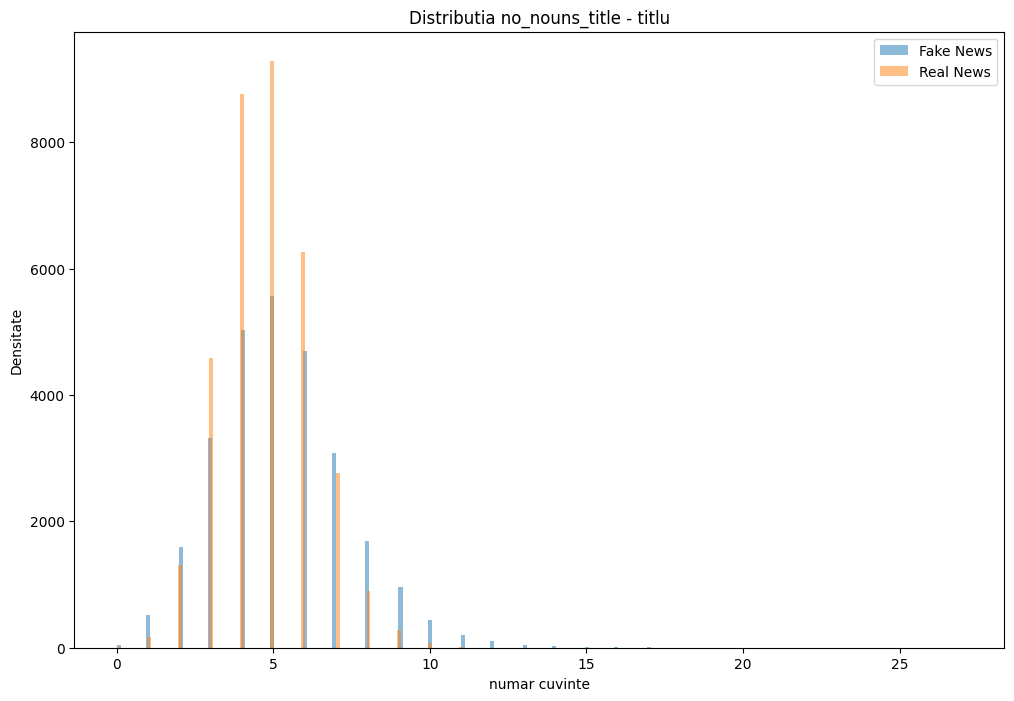

In [35]:
for indicator in ['no_adjectives_title', 'no_adverbs_title', 'no_verbs_title', 'no_nouns_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News')
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News')
    plt.xlabel('numar cuvinte')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'Distributia {indicator} - titlu')
    plt.show()

In [36]:
def count_sentences(text):
    if not isinstance(text, str):
        return 0
    sentences = sent_tokenize(text)
    return len(sentences)

df['no_sentences'] = df['text'].progress_apply(count_sentences)

100%|██████████| 61770/61770 [00:27<00:00, 2230.28it/s]


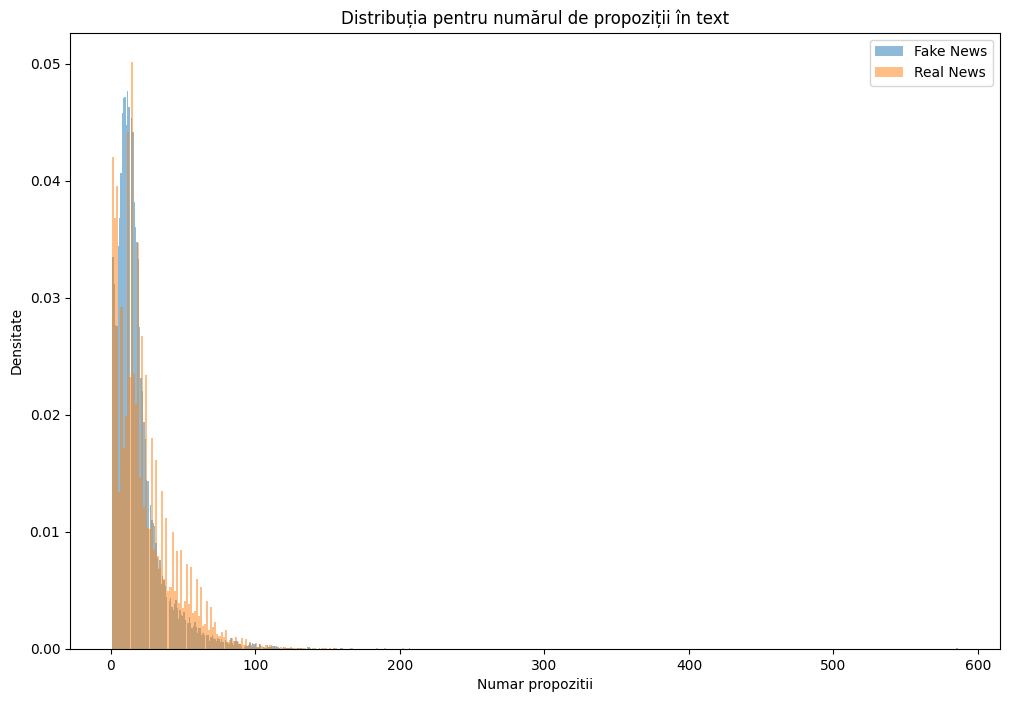

In [37]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['no_sentences'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['no_sentences'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Numar propozitii')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('Distribuția pentru numărul de propoziții în text')
plt.show()

In [55]:
def calculate_pos_ratio_title(row, pos_tag_count_col, total_words_col='no_words_title'):
    total_words = row[total_words_col]
    if total_words == 0:
        return 0
    return (row[pos_tag_count_col] / total_words)*100

df['adj_ratio_title'] = df.apply(lambda row: calculate_pos_ratio_title(row, 'no_adjectives_title'), axis=1)
df['adv_ratio_title'] = df.apply(lambda row: calculate_pos_ratio_title(row, 'no_adverbs_title'), axis=1)
df['verb_ratio_title'] = df.apply(lambda row: calculate_pos_ratio_title(row, 'no_verbs_title'), axis=1)
df['noun_ratio_title'] = df.apply(lambda row: calculate_pos_ratio_title(row, 'no_nouns_title'), axis=1)
df['det_ratio_title'] = df.apply(lambda row: calculate_pos_ratio_title(row, 'no_determiners_title'), axis=1)

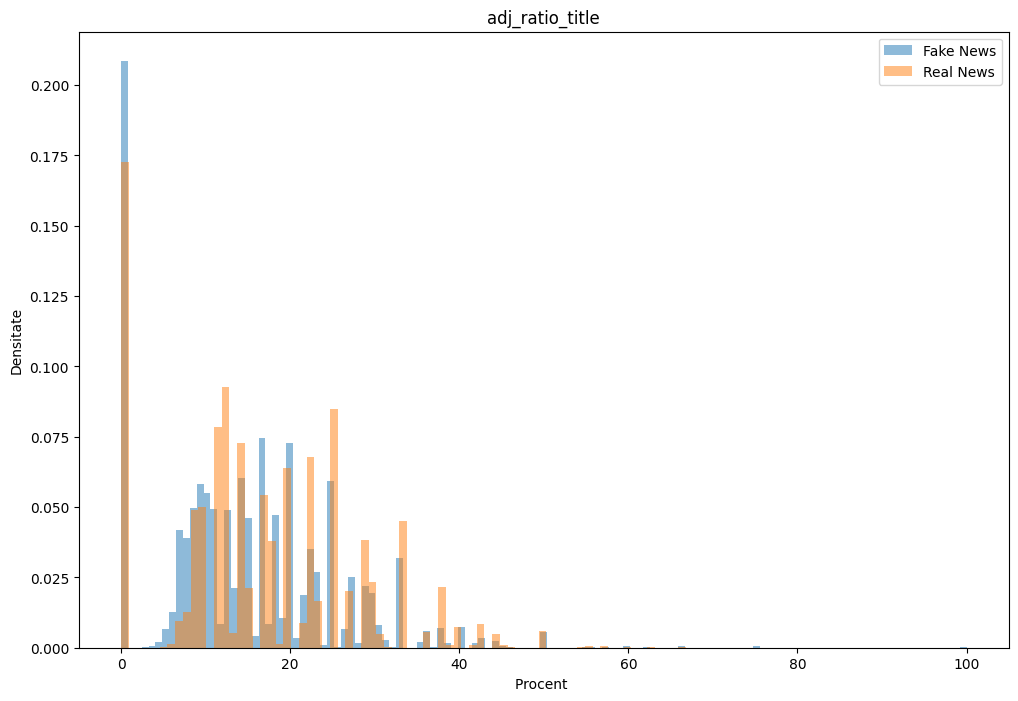

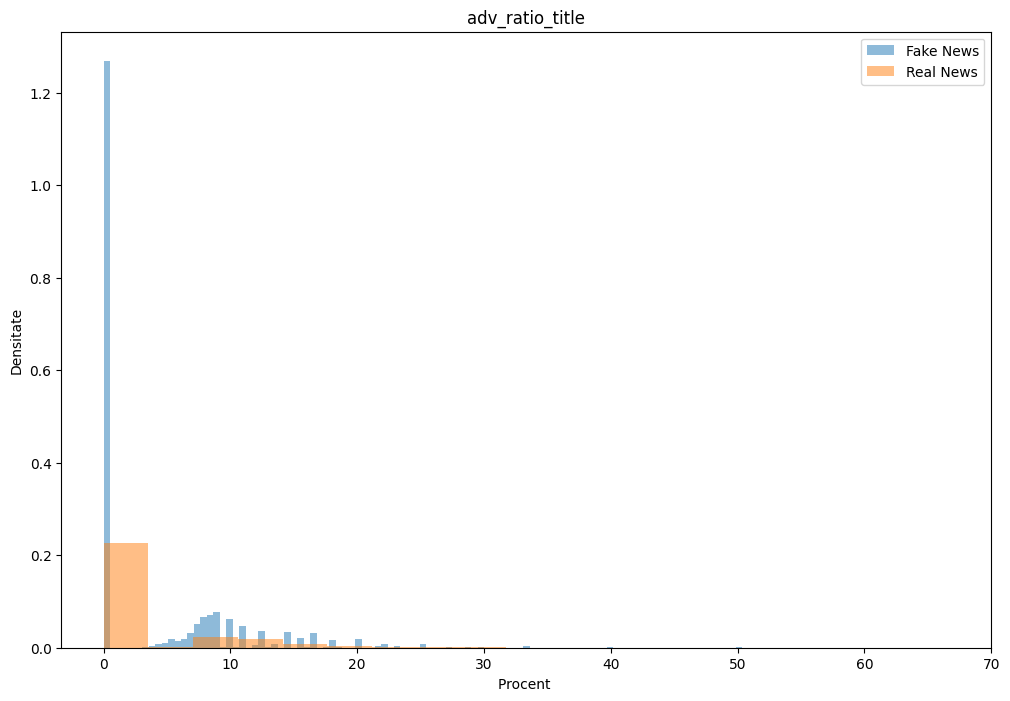

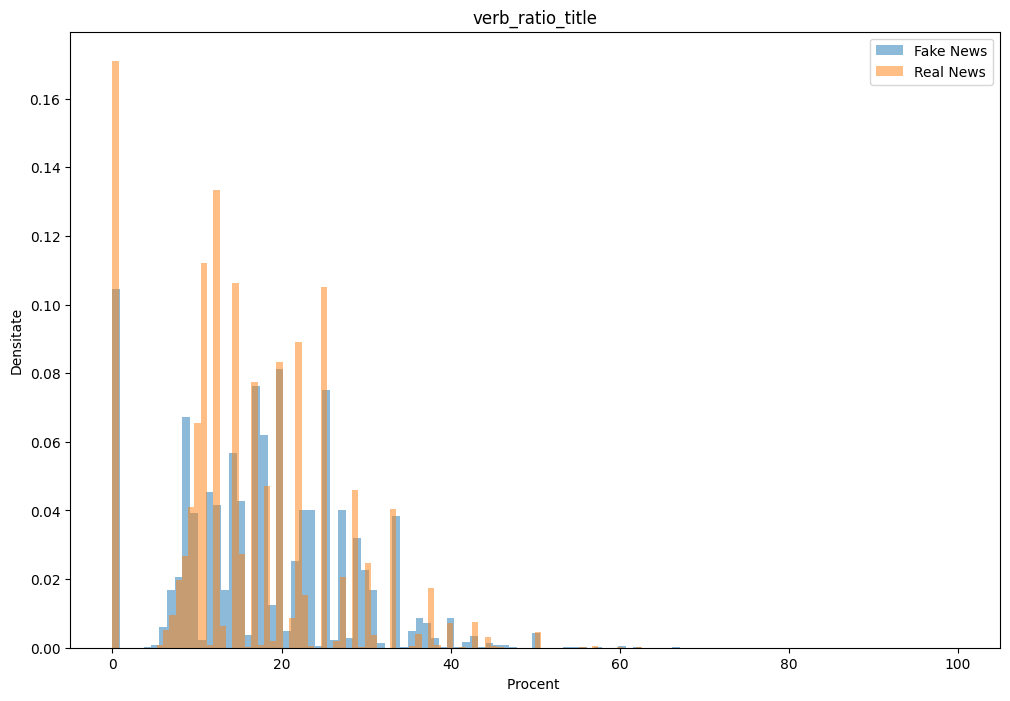

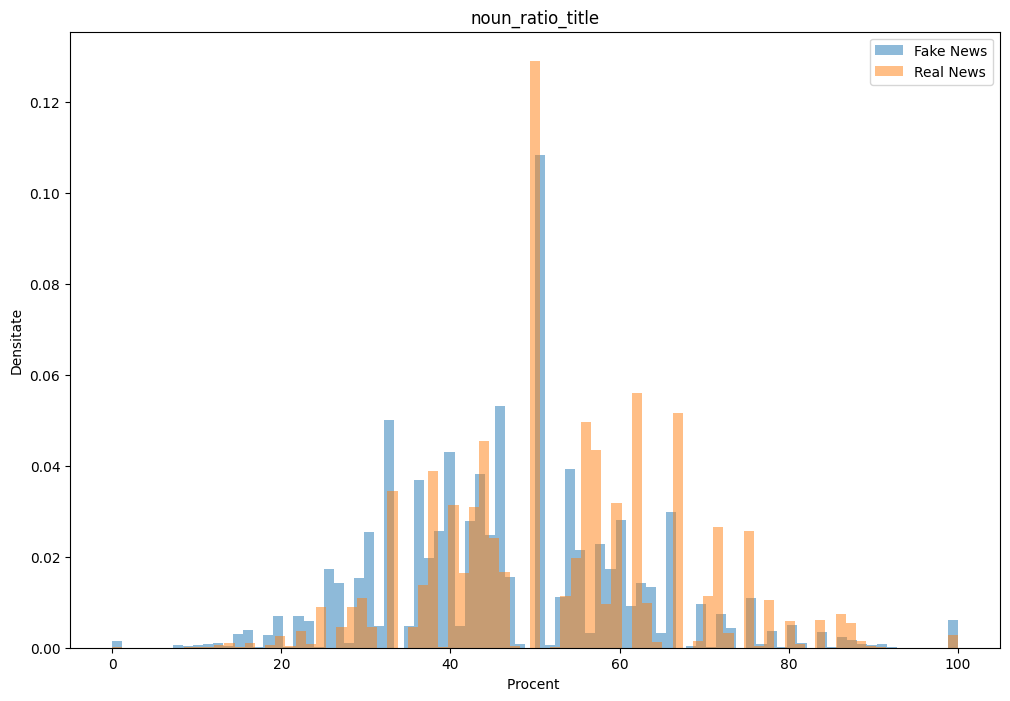

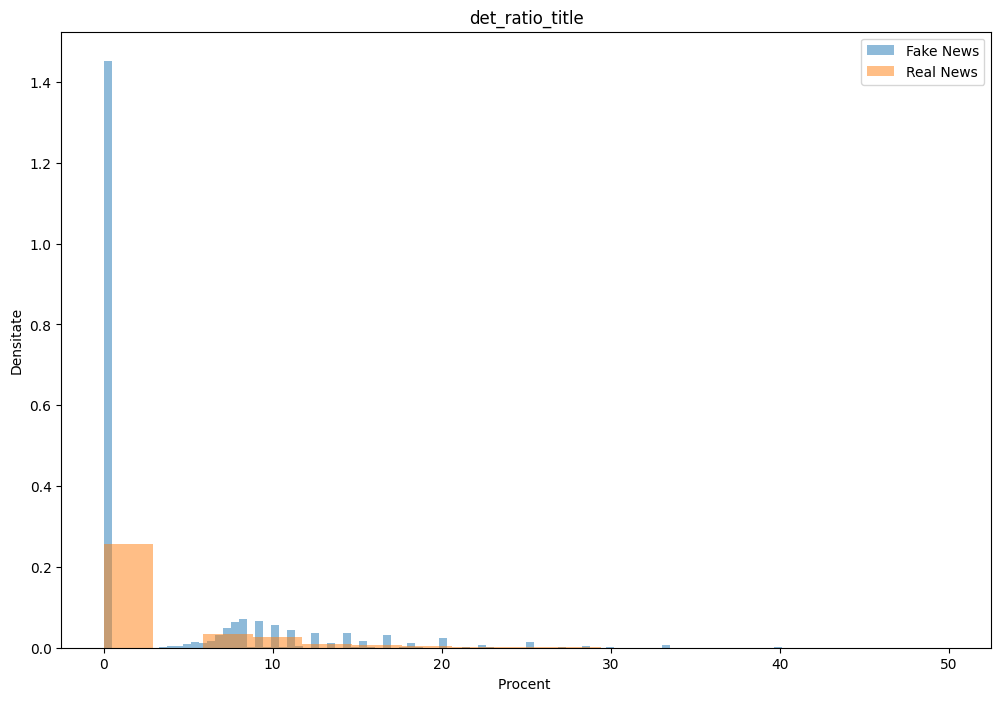

In [90]:
for indicator in ['adj_ratio_title', 'adv_ratio_title', 'verb_ratio_title', 'noun_ratio_title', 'det_ratio_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    plt.xlabel('Procent ')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'{indicator}')
    plt.show()

In [57]:
def calculate_pos_ratio_text(row, pos_tag_count_col, total_words_col='no_words_text'):
    total_words = row[total_words_col]
    if total_words == 0:
        return 0
    return (row[pos_tag_count_col] / total_words) * 100

df['adj_ratio_text'] = df.apply(lambda row: calculate_pos_ratio_text(row, 'no_adjectives'), axis=1)
df['adv_ratio_text'] = df.apply(lambda row: calculate_pos_ratio_text(row, 'no_adverbs'), axis=1)
df['verb_ratio_text'] = df.apply(lambda row: calculate_pos_ratio_text(row, 'no_verbs'), axis=1)
df['noun_ratio_text'] = df.apply(lambda row: calculate_pos_ratio_text(row, 'no_nouns'), axis=1)
df['det_ratio_text'] = df.apply(lambda row: calculate_pos_ratio_text(row, 'no_determiners'), axis=1)

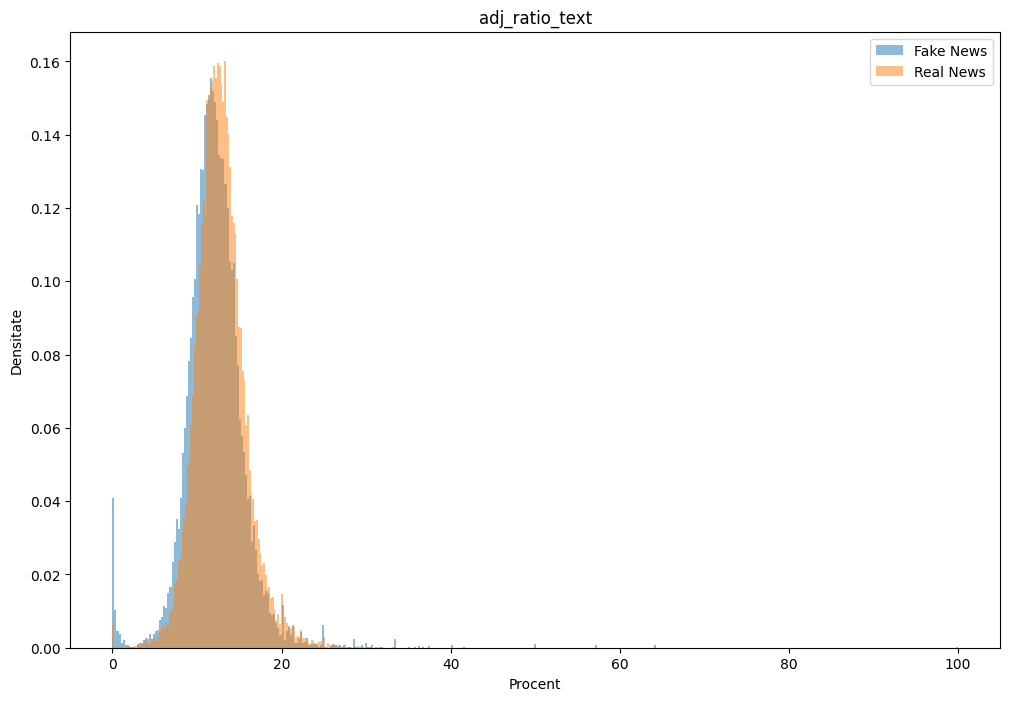

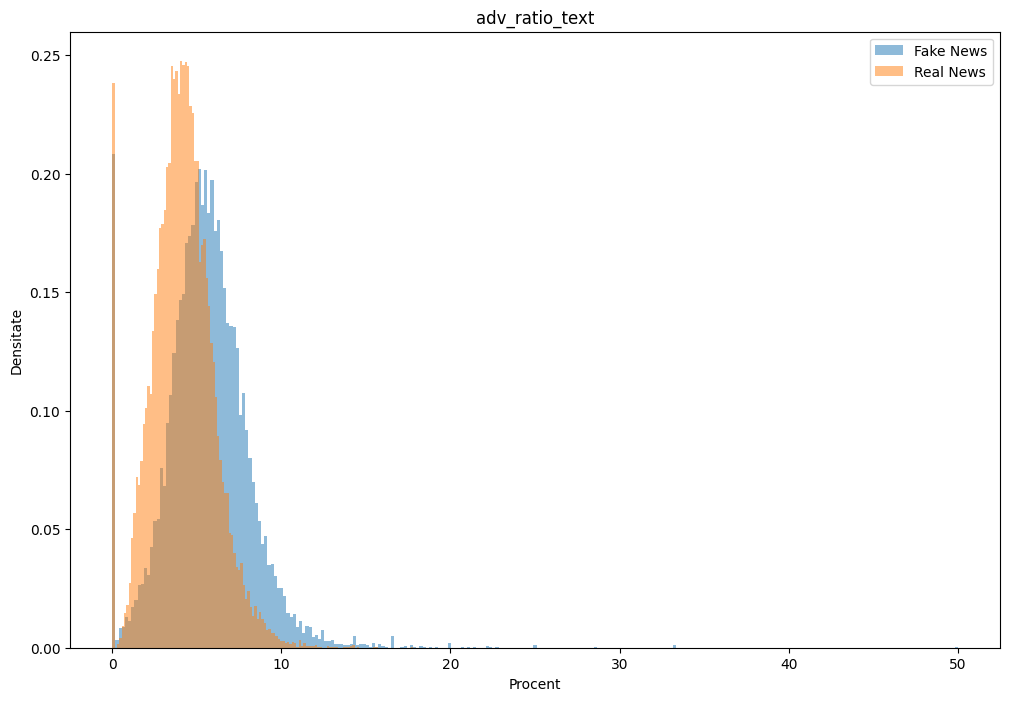

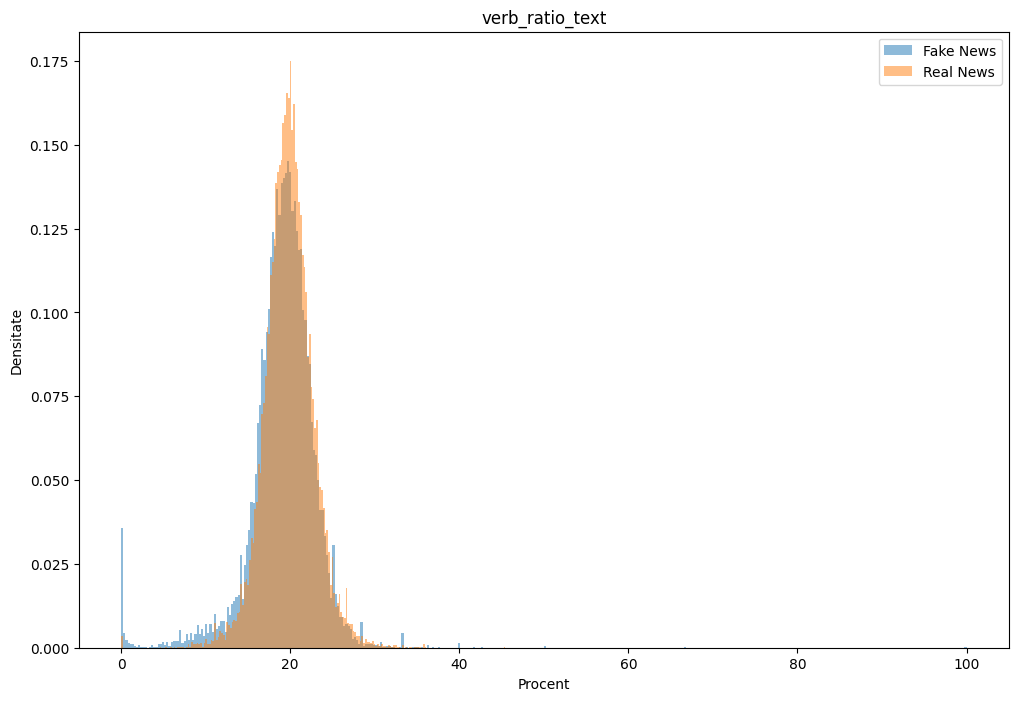

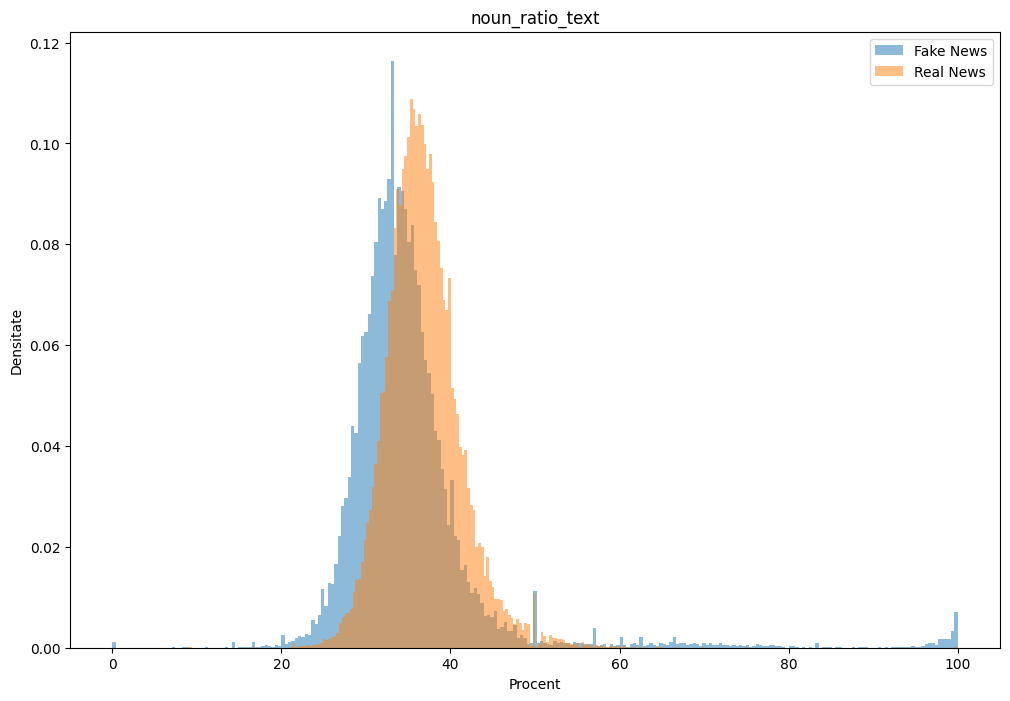

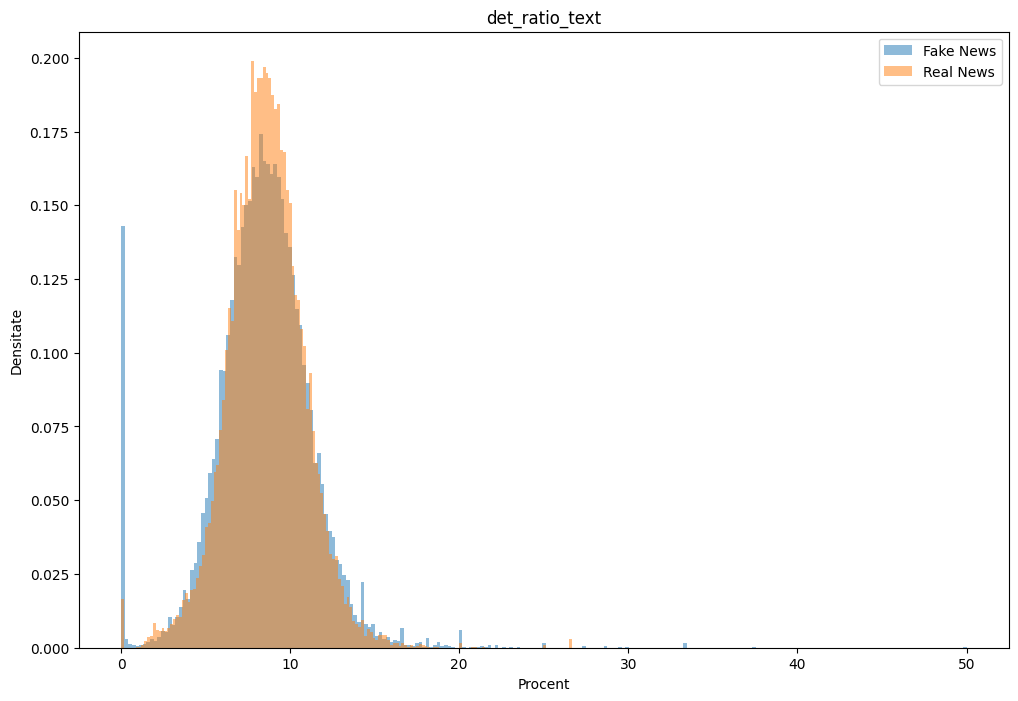

In [58]:
for indicator in ['adj_ratio_text', 'adv_ratio_text', 'verb_ratio_text', 'noun_ratio_text', 'det_ratio_text']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    plt.xlabel('Procent')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'{indicator}')
    plt.show()

In [59]:
df.columns

Index(['title', 'text', 'label', 'clean_text', 'clean_title',
       'clean_text_without_stopwords', 'clean_title_without_stopwords',
       'text_lemmatized', 'title_lemmatized', 'special_characters_text',
       'special_characters_title', 'no_uppercase_text', 'no_uppercase_title',
       'short_sentences', 'long_sentences', 'no_adjectives', 'no_determiners',
       'no_adverbs', 'no_verbs', 'no_nouns', 'no_adjectives_title',
       'no_determiners_title', 'no_adverbs_title', 'no_verbs_title',
       'no_nouns_title', 'gunning_fog', 'smog_index', 'ari', 'polarity',
       'subjectivity', 'title_text_similarity', 'syllables_text',
       'no_words_text', 'no_words_title', 'adj_adv_rate_text',
       'adj_adv_rate_title', 'words_per_sentence', 'no_sentences',
       'adj_ratio_title', 'adv_ratio_title', 'verb_ratio_title',
       'noun_ratio_title', 'words_per_title', 'syllables_per_word',
       'uppercase_per_title', 'uppercase_per_text',
       'uppercase_ratio_title_text', 'adj_rat

In [ ]:
def words_per_sentence_simple(row):
    if row['no_sentences'] == 0:
        return 0
    return row['no_words_text'] / row['no_sentences']

df['words_per_sentence'] = df.apply(words_per_sentence_simple, axis=1)

Text(0.5, 1.0, 'words_per_sentence')

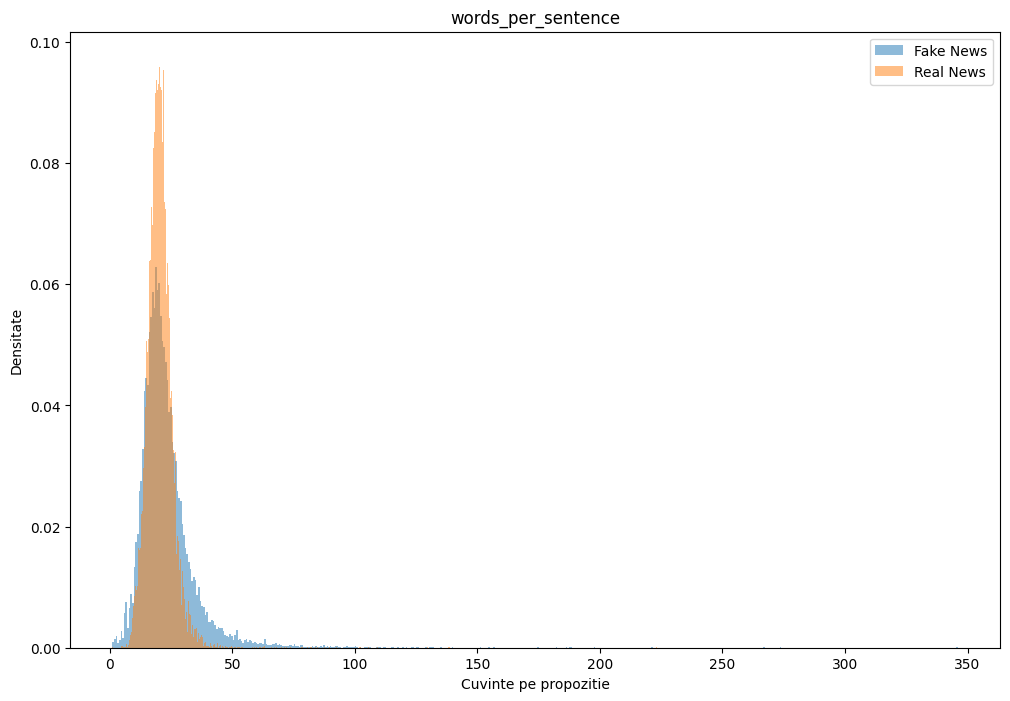

In [62]:
plt.figure(figsize=(12, 8)) 
plt.hist(df[df['label'] == 1]['words_per_sentence'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['words_per_sentence'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Cuvinte pe propozitie')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('words_per_sentence')

In [63]:
def syllables_per_word(row):
    total_syllables = row['syllables_text']
    total_words = row['no_words_text']
    if total_words == 0:
        return 0
    return total_syllables / total_words

df['syllables_per_word'] = df.apply(syllables_per_word, axis=1)

Text(0.5, 1.0, 'syllables_per_word_text')

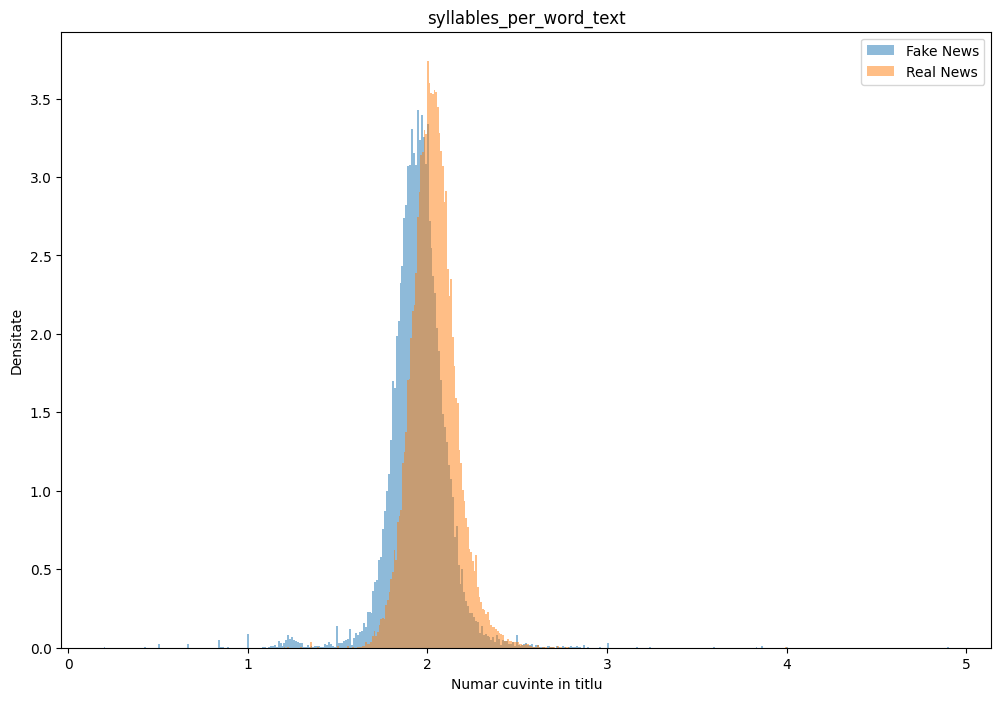

In [65]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['syllables_per_word'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['syllables_per_word'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Numar cuvinte in titlu')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('syllables_per_word_text')

In [66]:
def uppercase_per_title(row):
    total_words = row['no_words_title']
    if total_words == 0:
        return 0
    return (row['no_uppercase_title'] / total_words) * 100

def uppercase_per_text(row):
    total_words = row['no_words_text']
    if total_words == 0:
        return 0
    return (row['no_uppercase_text'] / total_words) * 100

df['uppercase_per_title'] = df.apply(uppercase_per_title, axis=1)
df['uppercase_per_text'] = df.apply(uppercase_per_text, axis=1)

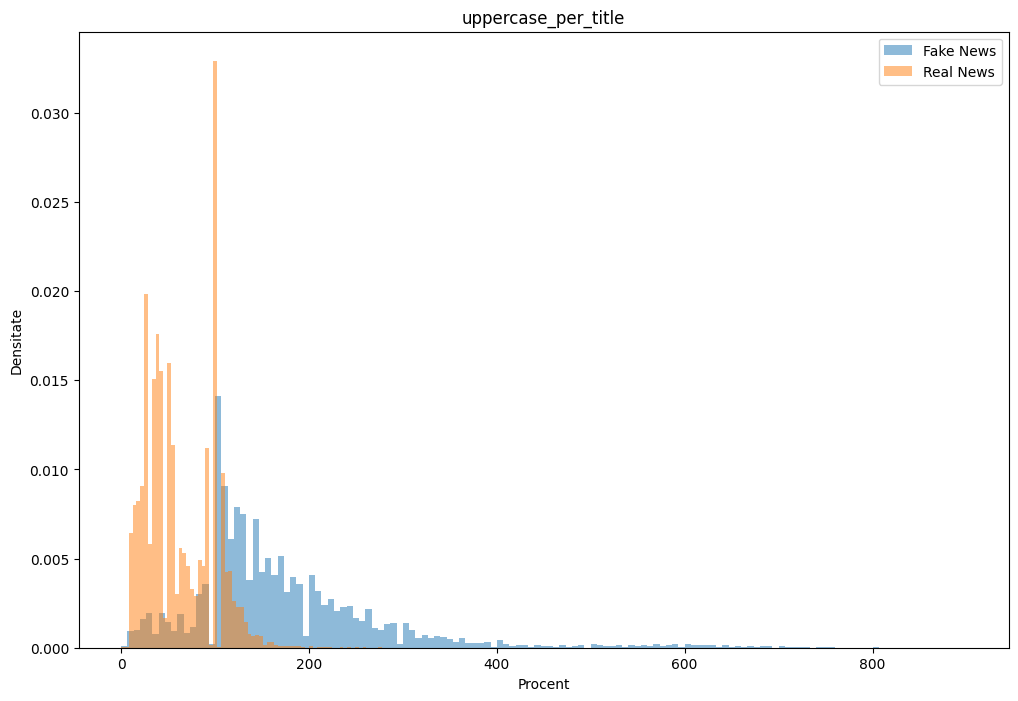

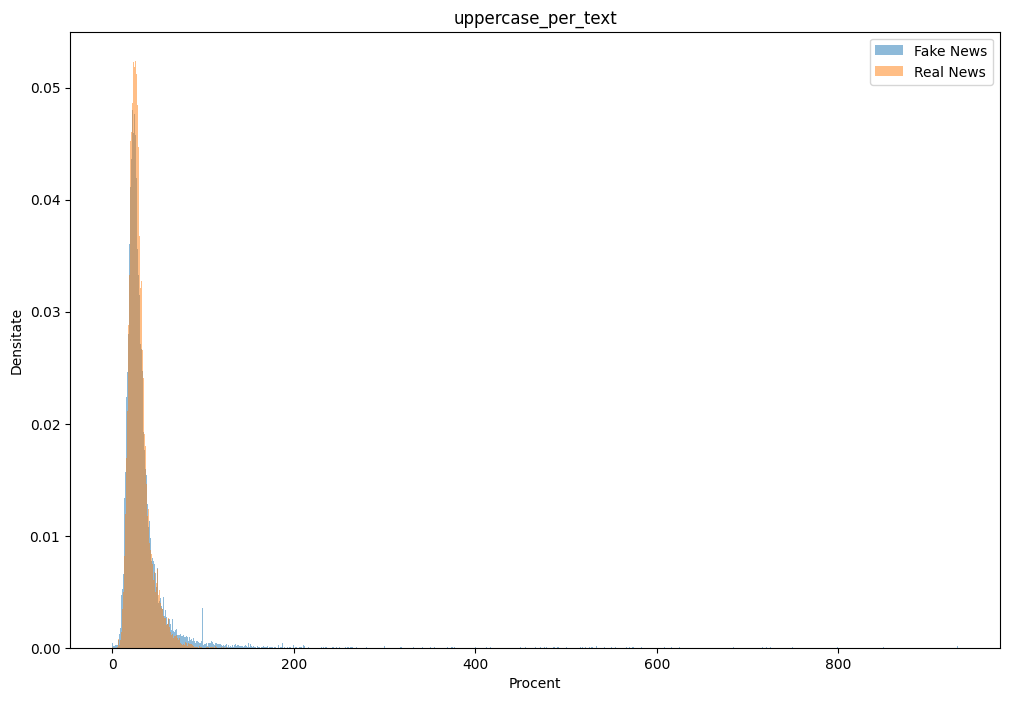

In [67]:
for indicator in ['uppercase_per_title', 'uppercase_per_text']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    plt.xlabel('Procent')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'{indicator}')
    plt.show()

In [68]:
def uppercase_ratio_title_text(row):
    if row['uppercase_per_text'] == 0:
        return 0 
    return row['uppercase_per_title'] / row['uppercase_per_text']

df['uppercase_ratio_title_text'] = df.apply(uppercase_ratio_title_text, axis=1)

Text(0.5, 1.0, 'uppercase_ratio_title_text')

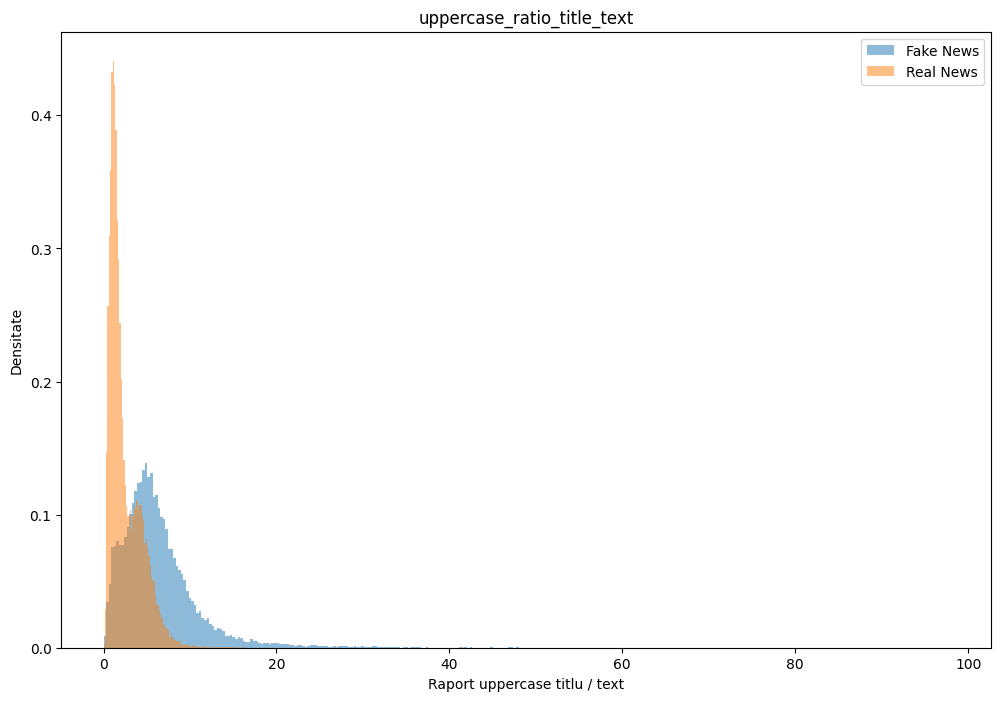

In [69]:
plt.figure(figsize=(12, 8))
plt.hist(df[df['label'] == 1]['uppercase_ratio_title_text'], bins='auto', alpha=0.5, label='Fake News', density=True)
plt.hist(df[df['label'] == 0]['uppercase_ratio_title_text'], bins='auto', alpha=0.5, label='Real News', density=True)
plt.xlabel('Raport uppercase titlu / text')
plt.ylabel('Densitate')
plt.legend(loc='upper right')
plt.title('uppercase_ratio_title_text')

In [73]:
df['short_sentences_ratio'] = df.apply(lambda row: row['short_sentences'] / row['no_sentences']*100 if row['no_sentences'] != 0 else 0,axis=1)
df['long_sentences_ratio'] = df.apply(lambda row: row['long_sentences'] / row['no_sentences']*100 if row['no_sentences'] != 0 else 0,axis=1)

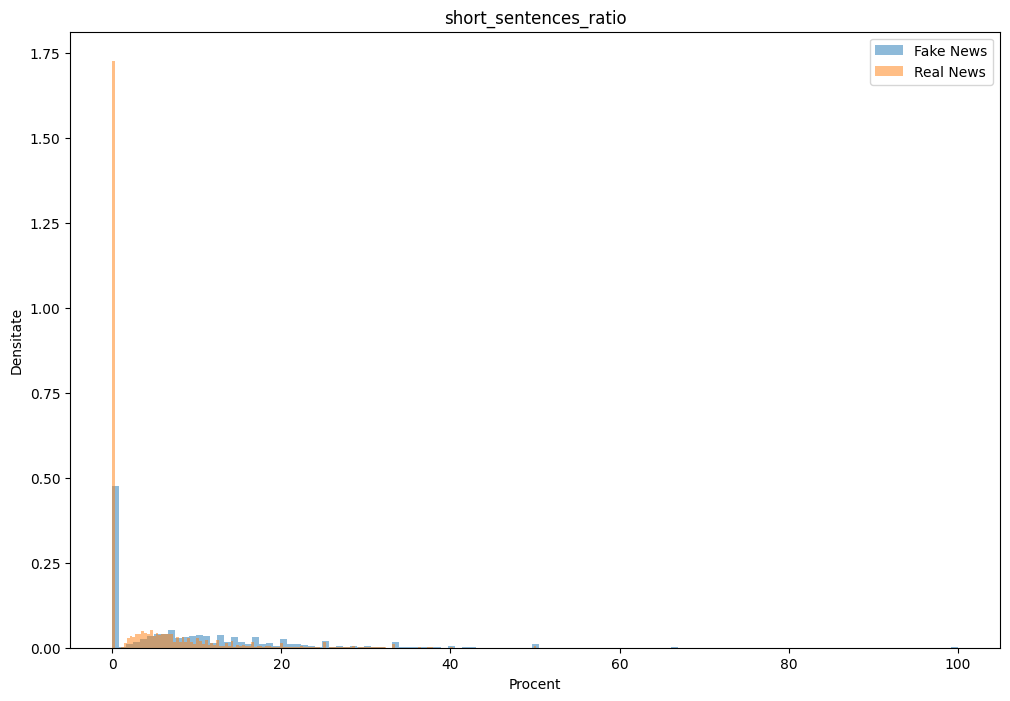

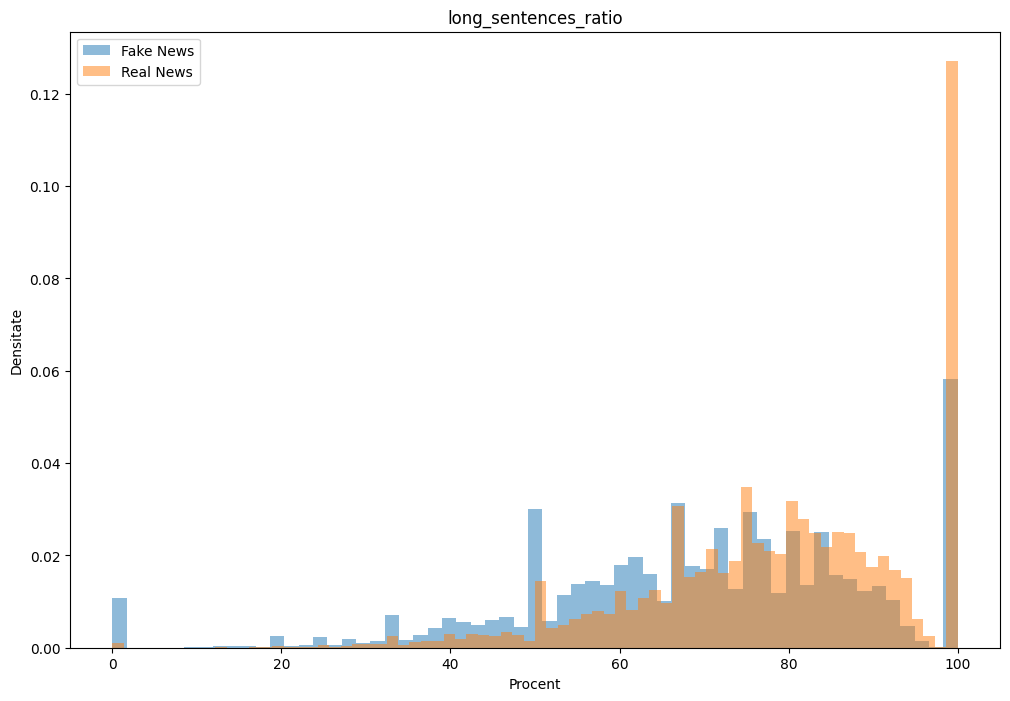

In [74]:
for indicator in ['short_sentences_ratio', 'long_sentences_ratio']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    plt.xlabel('Procent')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'{indicator}')
    plt.show()

In [75]:
df['special_characters_per_words_text'] = df.apply(lambda row: 
                                              row['special_characters_text'] / row['no_words_text']*100 if row['no_words_text'] != 0 else 0,axis=1)
df['special_characters_per_word_title'] = df.apply(lambda row: 
                                        row['special_characters_title'] / row['no_words_title']*100 if row['no_words_title'] != 0 else 0,axis=1)

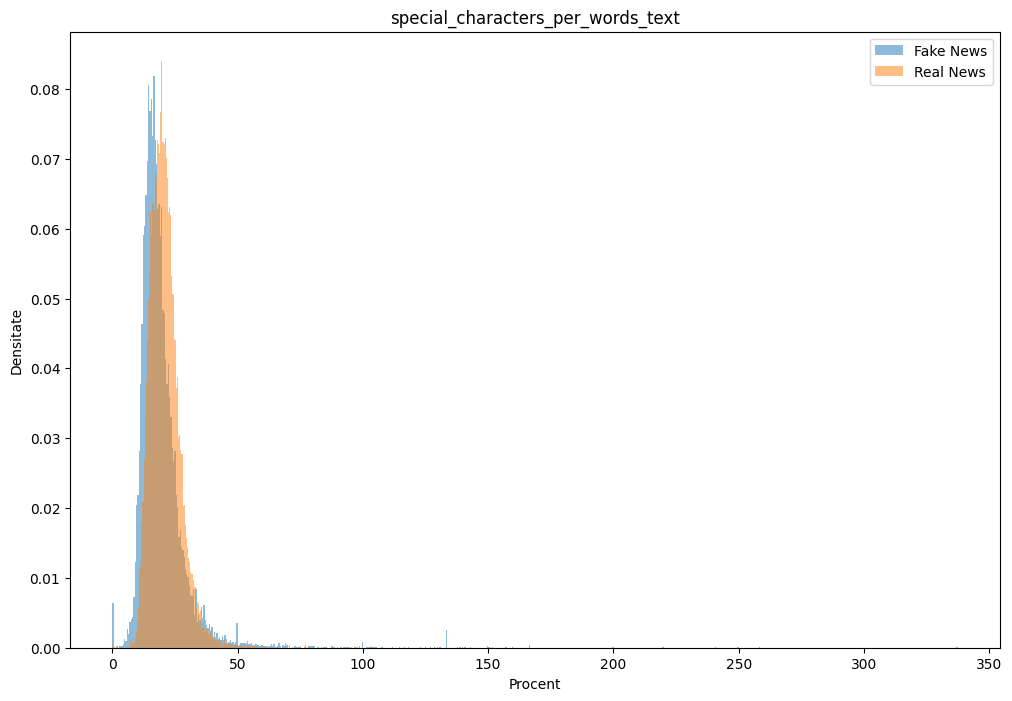

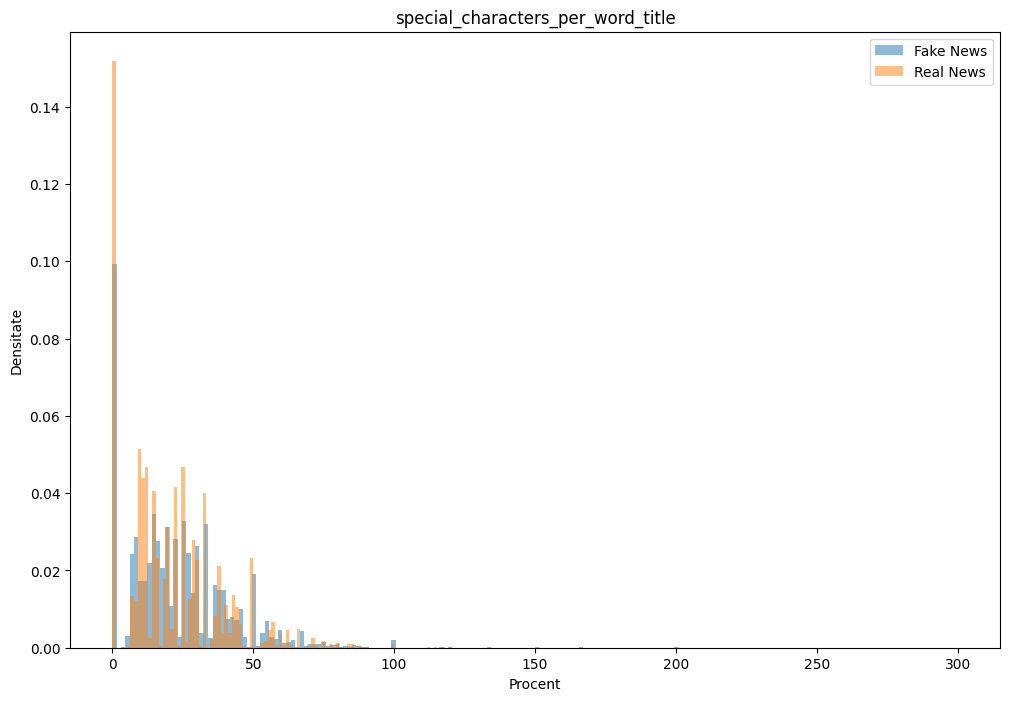

In [76]:
for indicator in ['special_characters_per_words_text', 'special_characters_per_word_title']:
    plt.figure(figsize=(12, 8))
    plt.hist(df[df['label'] == 1][indicator], bins='auto', alpha=0.5, label='Fake News', density=True)
    plt.hist(df[df['label'] == 0][indicator], bins='auto', alpha=0.5, label='Real News', density=True)
    plt.xlabel('Procent')
    plt.ylabel('Densitate')
    plt.legend()
    plt.title(f'{indicator}')
    plt.show()

Acum ca am toti acesti indicatori, vreau sa verific, pe langa vizualizarea graficelor, care dintre ei sunt relevanti pentru clasificare.

In [78]:
df.columns

Index(['title', 'text', 'label', 'clean_text', 'clean_title',
       'clean_text_without_stopwords', 'clean_title_without_stopwords',
       'text_lemmatized', 'title_lemmatized', 'special_characters_text',
       'special_characters_title', 'no_uppercase_text', 'no_uppercase_title',
       'short_sentences', 'long_sentences', 'no_adjectives', 'no_determiners',
       'no_adverbs', 'no_verbs', 'no_nouns', 'no_adjectives_title',
       'no_determiners_title', 'no_adverbs_title', 'no_verbs_title',
       'no_nouns_title', 'gunning_fog', 'smog_index', 'ari', 'polarity',
       'subjectivity', 'title_text_similarity', 'syllables_text',
       'no_words_text', 'no_words_title', 'adj_adv_rate_text',
       'adj_adv_rate_title', 'words_per_sentence', 'no_sentences',
       'adj_ratio_title', 'adv_ratio_title', 'verb_ratio_title',
       'noun_ratio_title', 'words_per_title', 'syllables_per_word',
       'uppercase_per_title', 'uppercase_per_text',
       'uppercase_ratio_title_text', 'adj_rat

Pastrez coloanele normalizate+restul

<Axes: >

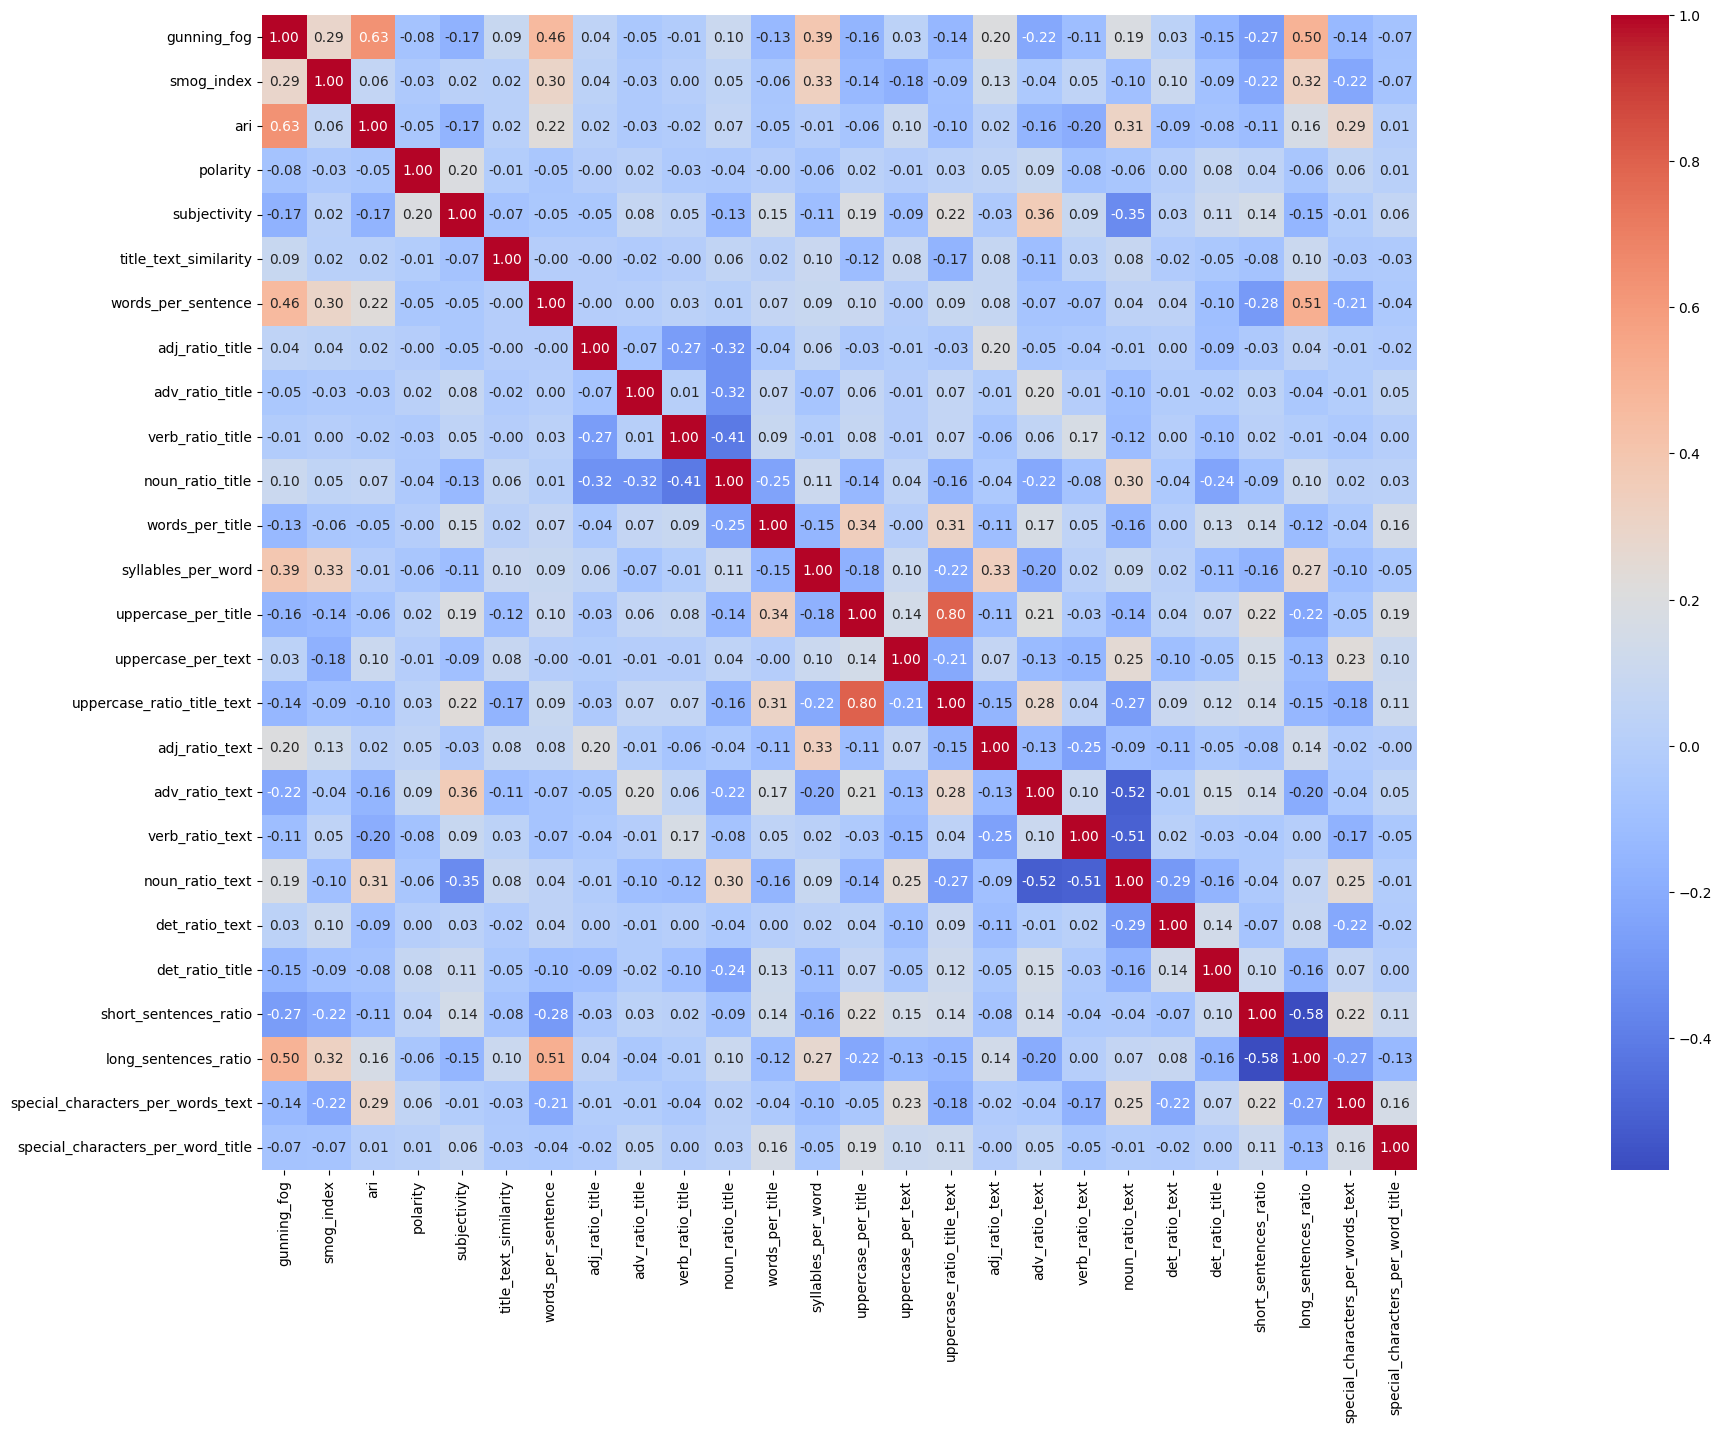

In [88]:
feature_cols = ['gunning_fog', 'smog_index', 'ari', 'polarity',
       'subjectivity', 'title_text_similarity', 'words_per_sentence', 
       'adj_ratio_title', 'adv_ratio_title', 'verb_ratio_title',
       'noun_ratio_title', 'words_per_title', 'syllables_per_word',
       'uppercase_per_title', 'uppercase_per_text',
       'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text',
       'verb_ratio_text', 'noun_ratio_text', 'det_ratio_text',
       'det_ratio_title', 'short_sentences_ratio', 'long_sentences_ratio',
       'special_characters_per_words_text',
       'special_characters_per_word_title']

df_features = df[feature_cols]
correlation_matrix = df_features.corr()

plt.figure(figsize=(50, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

In [94]:
X = df[feature_cols]
y = df['label']

mi_scores = pd.Series(mutual_info_classif(X, y, random_state=42), index=feature_cols)
mi_scores 

gunning_fog                          0.024646
smog_index                           0.023899
ari                                  0.021512
polarity                             0.017050
subjectivity                         0.063833
title_text_similarity                0.021389
words_per_sentence                   0.062748
adj_ratio_title                      0.051064
adv_ratio_title                      0.032155
verb_ratio_title                     0.051416
noun_ratio_title                     0.061596
words_per_title                      0.084176
syllables_per_word                   0.062382
uppercase_per_title                  0.309334
uppercase_per_text                   0.027542
uppercase_ratio_title_text           0.190570
adj_ratio_text                       0.024176
adv_ratio_text                       0.082421
verb_ratio_text                      0.020591
noun_ratio_text                      0.074748
det_ratio_text                       0.025503
det_ratio_title                   

In [95]:
pearson_corr = {}
pearson_pvals = {}

for feature in feature_cols:
    try:
        corr, p_val = pearsonr(df[feature], y)
        pearson_corr[feature] = corr
        pearson_pvals[feature] = p_val
    except Exception as e:
        print(f"Error with Pearson on feature {feature}: {e}")
        pearson_corr[feature] = np.nan
        pearson_pvals[feature] = np.nan

pearson_corr = pd.Series(pearson_corr)
pearson_pvals = pd.Series(pearson_pvals)

pearson_corr, pearson_pvals

(gunning_fog                         -0.135756
 smog_index                          -0.137410
 ari                                 -0.026834
 polarity                             0.016745
 subjectivity                         0.244298
 title_text_similarity               -0.119094
 words_per_sentence                   0.144650
 adj_ratio_title                     -0.091171
 adv_ratio_title                      0.122564
 verb_ratio_title                     0.083250
 noun_ratio_title                    -0.189599
 words_per_title                      0.300477
 syllables_per_word                  -0.281098
 uppercase_per_title                  0.579889
 uppercase_per_text                   0.085623
 uppercase_ratio_title_text           0.489883
 adj_ratio_text                      -0.110926
 adv_ratio_text                       0.308143
 verb_ratio_text                     -0.111354
 noun_ratio_text                     -0.122804
 det_ratio_text                      -0.031263
 det_ratio_ti

In [96]:
ttest_pvals = {}

for feature in feature_cols:
    try:
        group1 = df[df['label'] == 0][feature]
        group2 = df[df['label'] == 1][feature]
        t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
        ttest_pvals[feature] = p_val
    except Exception as e:
        print(f"Error with t-test on feature {feature}: {e}")
        ttest_pvals[feature] = np.nan

ttest_pvals = pd.Series(ttest_pvals)
ttest_pvals

gunning_fog                          1.558949e-233
smog_index                           3.196764e-248
ari                                   1.570428e-09
polarity                              5.646123e-05
subjectivity                          0.000000e+00
title_text_similarity                4.039567e-188
words_per_sentence                   4.394683e-246
adj_ratio_title                      2.071200e-115
adv_ratio_title                      3.589153e-199
verb_ratio_title                      2.549515e-95
noun_ratio_title                      0.000000e+00
words_per_title                       0.000000e+00
syllables_per_word                    0.000000e+00
uppercase_per_title                   0.000000e+00
uppercase_per_text                    2.524147e-84
uppercase_ratio_title_text            0.000000e+00
adj_ratio_text                       1.298359e-160
adv_ratio_text                        0.000000e+00
verb_ratio_text                      5.881139e-158
noun_ratio_text                

In [97]:
MI_THRESHOLD = 0.02
PEARSON_CORR_THRESHOLD = 0.1
TTEST_P_THRESHOLD = 0.05

selected_features = []

for feature in feature_cols:
    mi = mi_scores[feature]
    pearson = pearson_corr[feature]
    pearson_p = pearson_pvals[feature]
    ttest_p = ttest_pvals[feature]
    
    if (
        mi > MI_THRESHOLD and
        abs(pearson) > PEARSON_CORR_THRESHOLD and
        pearson_p < 0.05 and
        ttest_p < TTEST_P_THRESHOLD
    ):
        selected_features.append(feature)

print(f"Features selectate ({len(selected_features)}):")
print(selected_features)


Features selectate (17):
['gunning_fog', 'smog_index', 'subjectivity', 'title_text_similarity', 'words_per_sentence', 'adv_ratio_title', 'noun_ratio_title', 'words_per_title', 'syllables_per_word', 'uppercase_per_title', 'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text', 'verb_ratio_text', 'noun_ratio_text', 'short_sentences_ratio', 'long_sentences_ratio']


<Axes: >

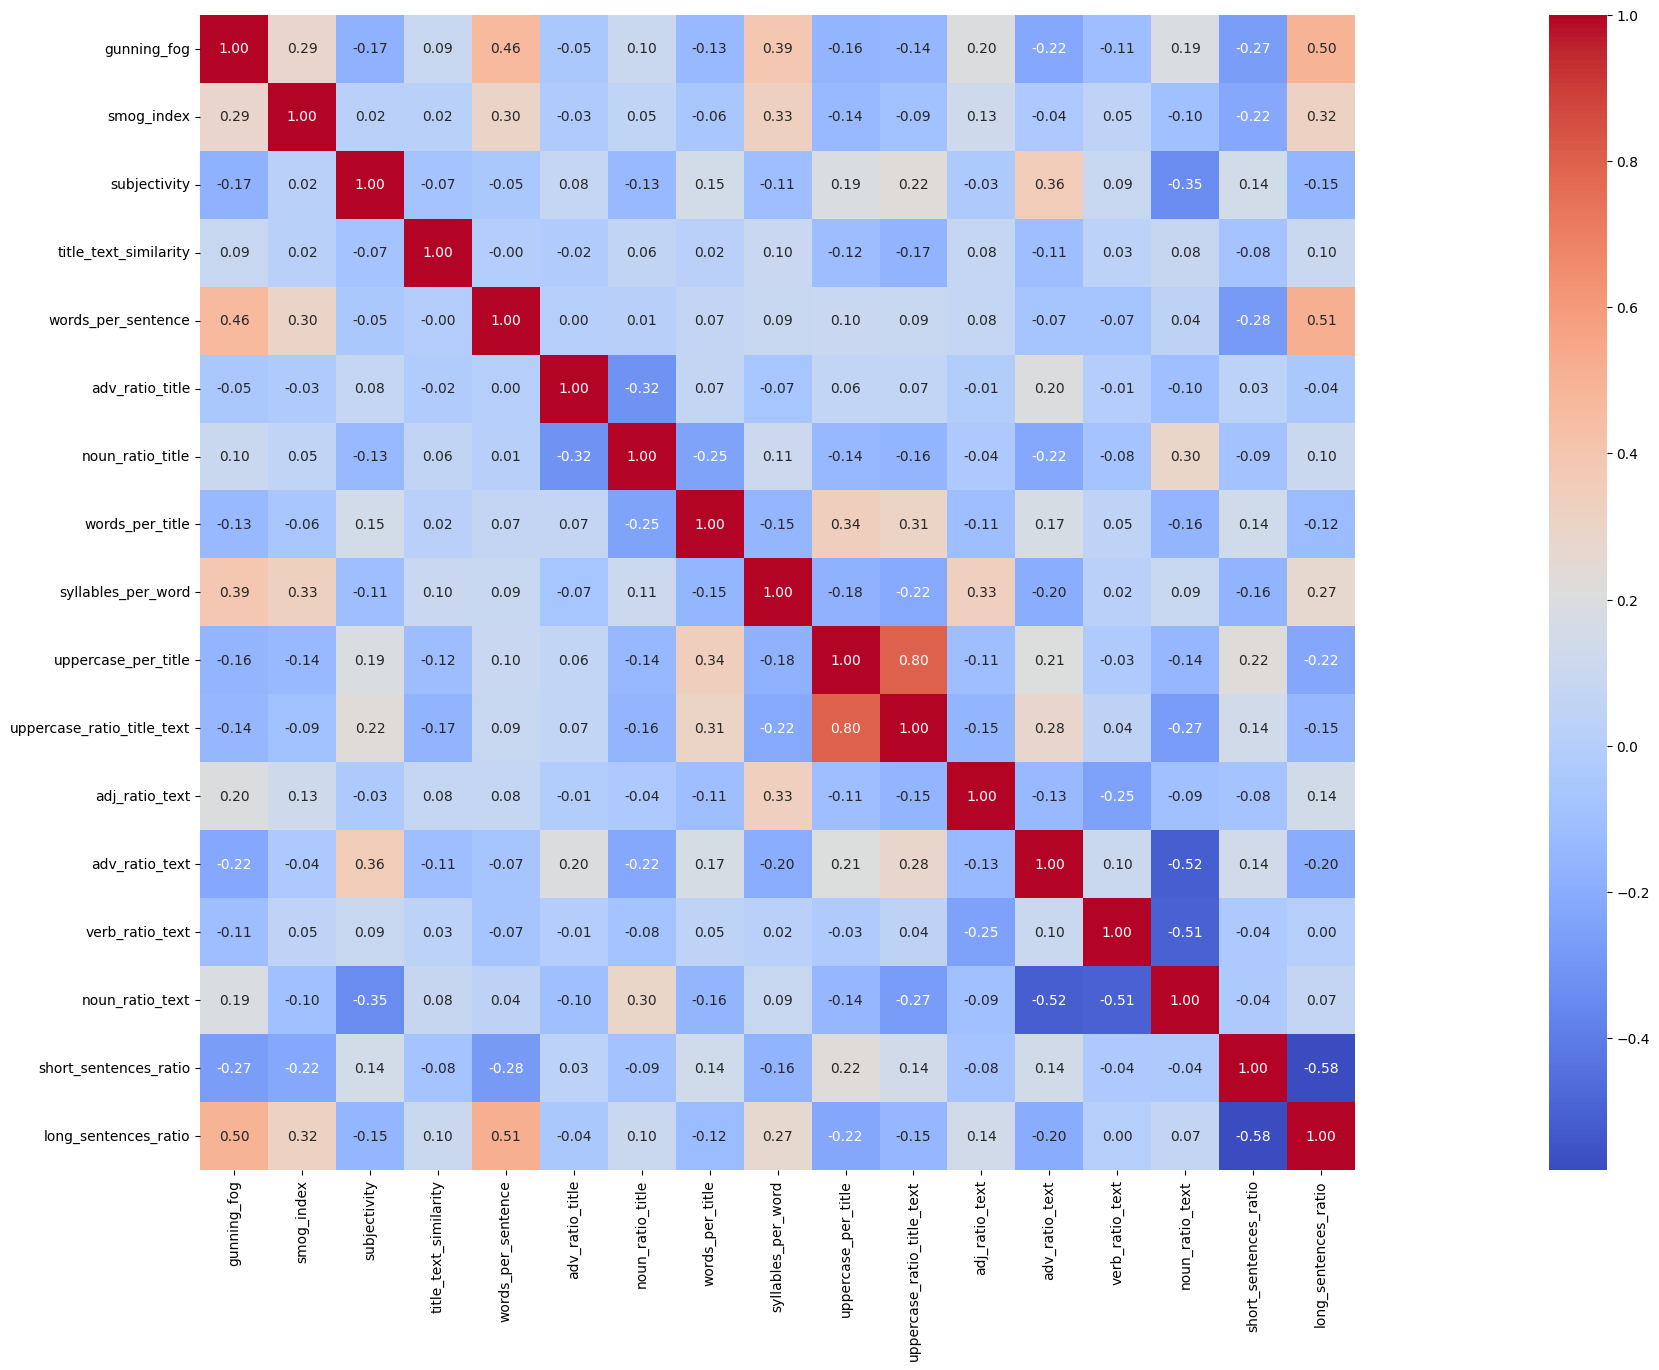

In [99]:
df_selected = df[selected_features] 
correlation_matrix = df_selected.corr()

plt.figure(figsize=(50, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

In [98]:
features_to_drop = list(set(feature_cols) - set(selected_features))
features_to_drop

['uppercase_per_text',
 'ari',
 'det_ratio_text',
 'special_characters_per_word_title',
 'polarity',
 'adj_ratio_title',
 'det_ratio_title',
 'verb_ratio_title',
 'special_characters_per_words_text']

In [102]:
df_with_features = df[['title', 'text', 'label', 'clean_text', 'clean_title',
       'clean_text_without_stopwords', 'clean_title_without_stopwords',
       'text_lemmatized', 'title_lemmatized']+selected_features]
df_with_features.columns

Index(['title', 'text', 'label', 'clean_text', 'clean_title',
       'clean_text_without_stopwords', 'clean_title_without_stopwords',
       'text_lemmatized', 'title_lemmatized', 'gunning_fog', 'smog_index',
       'subjectivity', 'title_text_similarity', 'words_per_sentence',
       'adv_ratio_title', 'noun_ratio_title', 'words_per_title',
       'syllables_per_word', 'uppercase_per_title',
       'uppercase_ratio_title_text', 'adj_ratio_text', 'adv_ratio_text',
       'verb_ratio_text', 'noun_ratio_text', 'short_sentences_ratio',
       'long_sentences_ratio'],
      dtype='object')

In [103]:
df_with_features.to_csv('features.csv', index=False)